# GML - Mini-Challenge 3 - FS 2022

**Ausgabe:** Montag, 23. Mai 2022  
**Abgabe:** Sonntag, 12. Juni 2022, bis 24 Uhr 

In diesem Mini-Challenge untersuchen wir die Struktur eines Datensatzes von Sonnenspektren.  

Cédric Huwyler hat uns freundlicherweise die Daten dafür bereitgestellt. Es handelt sich dabei um Daten gesammelt von der Nasa Iris Mission: https://iris.lmsal.com/  

Du findest etwas mehr Kontext auf folgender DS-Spaces Seite: https://ds-spaces.technik.fhnw.ch/iris-centroid-browser/  

#### Vorgaben zu Umsetzung und Abgabe

- Code muss in python geschrieben werden.
- Wir entwickeln die meisten Algorithmen selber. Wenn nicht explizit anders verlangt, dürfen bloss die folgenden Bibliotheken verwendet werden: numpy, matplotlib, seaborn, pandas
- Der Code muss lauffähig sein bei Ausführung im Docker-Container des Trainingcenters. 
- Es darf kein Code ausgelagert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Titel, Colorbar, ..), sodass der Plot einfach verstanden werden kann.
- Zu jedem Plot gibt es eine kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten die damit sichtbar werden festhält.  
- Als **Abgabe** zählt der letzte Commit in deinem Fork des Repos vor Abgabetermin.  


- **Bitte löschen, duplizieren oder verschieben sie die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Sie dürfen aber beliebig viele weitere Zellen hinzufügen.
- Bitte importiere Daten mit **relativen Pfaden** innerhalb des Repos.

Für die Erarbeitung der Inhalte darf zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**

---

### Aufgabe 1 (4 Punkte)

Lade den Datensatz der Sonnenspektren von folgendem Link herunter ( https://drive.switch.ch/index.php/s/SfcNAisJNpTxCrh ) und füge ihn dem `data`-Verzeichnis in diesem Repo zu (der Datensatz soll nicht committed und gepushed werden). Lade dann (`data/iris_sun_spectra.npy`) mit der Funktion `np.load`. Verwende einen relativen Pfad.

Der Wellenlängenbereich der Spektren ist 279.414 nm - 280.572 nm. Die Intensität der Spektren ist auf 1 normiert.  

Visualisiere einige (~ 100) zufällige Beispiele nebeneinander in einer Figure in Subplots und beschreibe was du vorfindest.

**Daten einlesen**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# YOUR CODE HERE
df_iris = np.load('../../data/iris_sun_spectra.npy')
print(df_iris.shape)
#df_iris[0, :]

(791537, 240)


**Visualisieren 100 Beispiele**

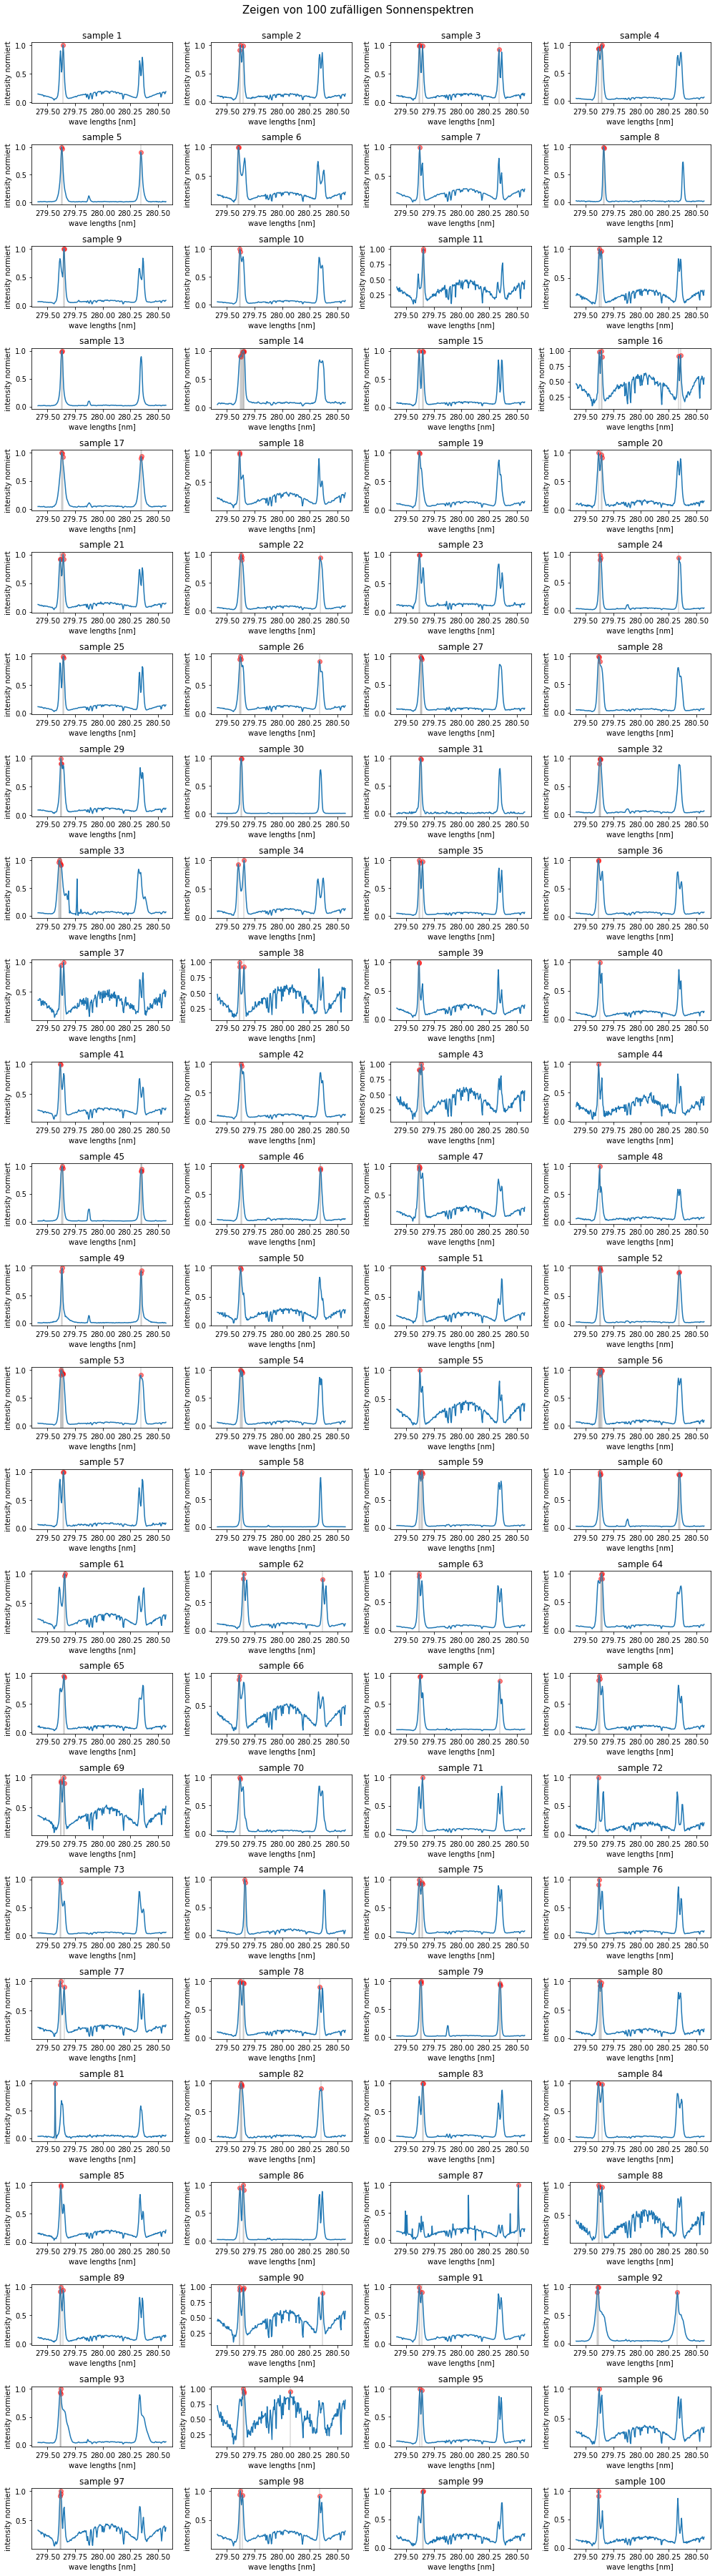

In [3]:
np.random.seed(42)

# 100 zufällige Beispiele auswählen
idx_rnd = np.random.randint(0, df_iris.shape[0], 100)
df_plot_100 = df_iris[idx_rnd, :].copy()
#print(f'{df_plot_100.shape=}')

# plote die zufälligen Beispiele
fig, ax = plt.subplots(25, 4, figsize=(14,50))
ax = ax.flatten()

# Wellenlänge zwischen 279.414nm und 280.572nm, verwende linspace für 240 Punkte dazwischen
x_label = np.linspace(279.414, 280.572, 240)

for i, data in enumerate(df_plot_100):
    ax[i].plot(x_label, df_plot_100[i, :])
    ax[i].set_title(f'sample {i+1}')
    ax[i].set_xlabel('wave lengths [nm]')
    ax[i].set_ylabel('intensity normiert')
    
    # zeichnen Picks grösser 0.8
    for k, point in enumerate(data):
        if point > 0.9:
            ax[i].scatter(x_label[k], point, color='red', alpha=0.5)
            ax[i].axvline(x_label[k], color='gray', alpha=0.3)

fig.suptitle('Zeigen von 100 zufälligen Sonnenspektren', fontsize=15, y=1) 
plt.tight_layout()
plt.show()

In allen Samples fallen die zwei Picks, bei denen die Intensität auf nahezu 1 springt, als Muster auf. Zudem gibt es zwischen diesen Picks in vielen Fällen ein Anstieg und Abfall der Intensität wobei die maximale Stärke der Intensität unterschiedlich sein kann. Dieses Muster kann auch unterhalb und oberhalb der gemessenen Wellenlänge beobachtet werden

### Aufgabe 2 (8 Punkte)

Schreibe eine Klasse, analog einer Transformer-Klasse in scikit-learn, welche die Principal Components mittels Singular Value Decomposition berechnet.  
Für einen beliebigen Datensatz sollen dabei alle möglichen Principal Components berechnet werden.  

Nach Ausführen der `fit`-Methode, soll ein Objekt die Attribute `components_` und `variance_` aufweisen, welche die Principal Components als Zeilenvektoren, bzw. die Varianz des Datensatzes entlang der Komponenten ausweist.  

Konstruiere und visualisiere ein einfaches 2-dimensionales Beispiel mit welchem du zeigst, dass deine Klasse wie erwartet funktioniert. Zeige insbesondere, dass die erste Principal Component tatsächlich in Richtung der grössten Varianz zeigt und dass die Berechnung der Varianzen entlang der Principal Components berechnet stimmen. Erkläre diese Verifikation der Funktionstüchtigkeit.

In [4]:
import numpy as np
import scipy as sp

class PCA():
    '''
    Berechnet die Pricipal Componets mit SVD eines Datensatzes
    
    '''
    def __init__(self, n_components=None):
        '''
        df: Datendatz für PCA berechnung
        '''
        self.n_components = n_components
        #self.X = np.array([])
        self.U_ = np.array([])
        self.S_ = np.array([])
        self.VT_ = np.array([])
        self.components_ = np.array([])
        self.variance_ = np.array([])    
        self.eigvals_ = np.array([])
        self.X_ = np.array([])
        
    def fit(self, X, print_info=False):
        '''     
        output: components_ als Zeilenvektor und variance_ entlang PC
        '''
        # Singulärwertzerlegung
        self.U_, self.S_, self.VT_ = np.linalg.svd(X) 
        
        # Eigenwerte sind die quadrierten singulärwerte aus der Matrix S
        self.eigvals_ = np.square(self.S_)
        
        # Principal Componenten erstellen, (Eigenvektoren je nach Deffinition)
        self.components_ = self.VT_
        
        # Berechne varianz durch die Eigenwerte, Eigenwert / Summe aller Eigenwerte
        self.variance_ = self.eigvals_ / np.sum(self.eigvals_)   
        
        if print_info:
            print(f'{self.variance_=}')   
            print(f'sing. Werte: {S=}')
        
        return self
    
        
    def fit_transform(self, X, k_components=None, var_proz=None):
        '''
        output: df_reduced,berechnet PCA und reduziert die Daten
        '''
        # mean center data
        self.X_ = X.copy()
        X = PCA.center_data(X)
        self.X_mean_ = X.mean(axis=0)
        
        # Singulärwertzerlegung
        self.U_, self.S_, self.VT_ = np.linalg.svd(X, full_matrices=False)  
        
        # Eigenwerte sind die quadrierten singulärwerte aus der Matrix S
        self.eigvals_ = np.square(self.S_)
        
        # Berechne varianz durch die Eigenwerte, Eigenwert / Summe aller Eigenwerte        
        self.variance_ = self.eigvals_ / np.sum(self.eigvals_)
        self.variance_ = self.variance_[:k_components]
        
        # Principal Componenten erstellen, (Eigenvektoren je nach Deffinition)
        self.components_ = self.VT_
        self.components_ = self.components_[:k_components, :] 
        
        if var_proz != None:
            k_comp = self.calc_var_proz(X, var_proz)
            print(f'{k_comp} Komponenten notwendig für >= {var_proz}')
        else:
            k_comp = k_components
            
        S_matrix = np.diag(self.S_[:k_comp])    
        U = self.U_[:, :k_comp]
        VT = self.VT_[:k_comp, :]
        
        # Berechne Daten Reduktion PCA, beide liefern die gleichen Resulate mit 
        # S_matrix schneller?! X_approx wäre dann U @ S_martix @ VT
        #X_pca = (VT @ X.T).T
        X_pca = U @ S_matrix
                    
        return X_pca   
    
    def fit_with_covar(self, X):
        '''
        Funktion verwendet die covarianzmatrix um die Principal Components (Eigenvektoren) zu berechnen
        outut: components_ als Zeilenvektor und variance_ entlang PC
            '''
        # mean center data
        self.X_ = X.copy()
        X = PCA.center_data(X)

        # Berechnnen der Covarianzmatrix
        X_cov = PCA.covariance_matrix(X, numpy=False)

        # Singulärwertzerlegung der Covarianzmatrix
        self.U_, self.S_, self.VT_ = np.linalg.svd(X_cov, full_matrices=True)

        # Principal Componenten erstellen, (Eigenvektoren je nach Deffinition)
        self.components_ = self.VT_

        # Berechne varianz durch die Eigenwerte, Eigenwert / Summe aller Eigenwerte
        self.variance_ = self.S_ / np.sum(self.S_)  

        return self      
        
    def fit_transform_covar(self, X, k_components=None, var_proz=None):
        '''
        output: df_reduced,berechnet PCA und reduziert die Daten
        '''
        # mean center data
        self.X_ = X.copy()
        X = PCA.center_data(X)

        # Berechnnen der Covarianzmatrix
        X_cov = PCA.covariance_matrix(X, numpy=False)

        # Singulärwertzerlegung
        self.U_, self.S_, self.VT_ = np.linalg.svd(X_cov, full_matrices=True)  

        # Berechne varianz durch die Eigenwerte, Eigenwert / Summe aller Eigenwerte        
        self.variance_ = self.S_ / np.sum(self.S_)
        self.variance_ = self.variance_[:k_components]

        # Principal Componenten erstellen, (Eigenvektoren je nach Deffinition)
        self.components_ = self.VT_
        self.components_ = self.components_[:k_components, :] 

        if var_proz != None:
            k_comp = self.calc_var_proz(X, var_proz)
            print(f'{k_comp} Komponenten notwendig für >= {var_proz}')
        else:
            k_comp = k_components

        S_matrix = np.diag(self.S_[:k_comp])    
        U = self.U_[:, :k_comp].copy()
        VT = self.VT_[:k_comp, :].copy()

        # Berechne Daten Reduktion PCA, Inputdaten mit den Anzahl k Eigenvektoren reduzieren
        X_pca = (X @ U)

        return X_pca           

        
    
    def calc_var_proz(self, X, limit_prozent):
        '''
        Berechnet die Anzahl notwendigen Komponenten um eine bestimmte Varianz zu behalten
        '''
        # mean center data
        self.X_ = X.copy()
        X = PCA.center_data(X)

        # Berechnnen der Covarianzmatrix
        X_cov = PCA.covariance_matrix(X, numpy=False)
        
        _, S, _ = np.linalg.svd(X_cov)
        
        #eig_vals = np.square(S)
        
        #variance = eig_vals / np.sum(eig_vals)
        variance = S / np.sum(S)
        #print(variance)
        
        for k in range(1, len(variance)+1):
            var_proz = np.sum( variance[:k] )
            #print(f'{var_proz=}')
            
            if var_proz > limit_prozent:
                return k
        return len(variance)
            
    
    def plot_variance_explained(self, k_comp=10, limit=0.95, cumsum=True, figsize=(20,6)):
        '''
        Zeichnet die prozuentale Variance explained mit oder ohne cumsum
        '''
        fig = plt.figure(figsize=figsize)
        
        # zeichen Variance
        x_label = ['pc' + str(i+1) + ', ' + str(var.round(3)) for i, var in enumerate(self.variance_)]
        
        print(len(x_label), len(self.variance_))

        plt.bar(x_label[:k_comp], self.variance_[:k_comp])
        if cumsum:
            plt.scatter(np.arange(k_comp), np.cumsum(self.variance_[:k_comp]), color='red', label='cumsum(variance)')
        plt.ylim(0, 1)
        plt.axhline(limit, color='red', alpha=0.3, label=f'treshhold: {limit*100}%')
        plt.xticks(rotation=90)
        plt.xlabel('Principal Components')
        plt.ylabel('% of variance explained')
        plt.title('PCA Reduktion und erklärte Varianz')
        plt.legend(loc='center right')
        plt.grid()
        plt.show()
    
    def rekonstruktion(self, X_pca, k_components):
        '''
        Kehrt PCA um mithilfe von SVD
        k_components: Anzahl PC verwendet
        '''
        VT = self.VT_
        U = self.U_
        S = self.S_
        print(f'U:{U.shape}, S:{np.diag(S[:k_components]).shape}, X_PCA{X_pca.shape}')
        X_rekonstruiert = (X_pca @ U[:, :k_components].T) + self.X_.mean(axis=0)
        
        return X_rekonstruiert
    
    @staticmethod
    def center_data(X):
        X_centered = X - X.mean(axis=0)
        return X_centered
    
    @staticmethod
    def normalize(X):
        X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
        return X_norm
    
    @staticmethod
    def covariance_matrix(X, numpy=False):
        # center data, damit Mittelwert = 0, wenn bereits zentriert dann keinen Einfluss
        PCA.center_data(X) 
        
        # Berechnen der Covarianzmatrix       
        if numpy:
            cov_matrix = np.cov(X)
        else:                   
            n = X.shape[0]
            cov_matrix = 1/n * (X.T @ X)
        
        return cov_matrix        

**Einfaches 2-d Beispiel test**

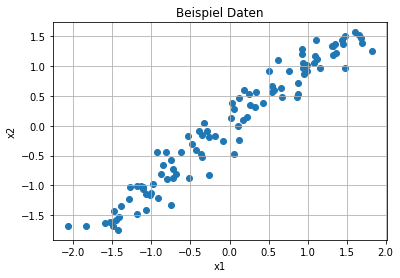

In [5]:
# Random Datensatz aus Aufgabenstellung
np.random.seed(42)
mu, n = 5, 100
x1 = np.random.uniform(mu, size=n)
# y mit zusätzliches Rauschen
x2 = 3*x1 + np.random.normal(0, 1, n)

# Standardisierung der Daten
X_sample = np.vstack([x2, x1]).T
X_sample_norm = PCA.normalize(X_sample)

# zeichnen der Beispieldaten
plt.scatter(X_sample_norm[:,0],  X_sample_norm[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Beispiel Daten')
plt.grid()
plt.show()

**Zeigen das PCA funktioniert**  
Die Klasse PCA() berechnet mit der Singulärwertzerlegung die Eigenwerte und Eigenvektoren der Kovarianzmatrix von X_sample_norm. Die Daten sollen in Standardisierter oder Gemittelten Form vorliegen (PCA Klasse hat eine Funktionen dafür). `components_` gibt die Eigenvektoren zurück und `variance_` die prozuentale Erklärung der Daten durch die einzelnen Principal Components

In [6]:
# Erstelle Objekt
pca = PCA()

# fit methode
pca.fit(X_sample_norm, print_info=False)

# Erstelle Objekt, covarianz
pca_covar = PCA()

# fit methode, covarianz
pca_covar.fit_with_covar(X_sample_norm)

**Zeigen, dass die grösste PC entlang der grössten Varianz zeigt**  
components oder loading scores beschreiben die Eigenvektoren der Kovarianzmatrix (SVD() -> Matrix V).  
In den Beispieldaten enthalten sind zwei Attribute x1 und x2 beide erhalten einen Eigenvektor, der entlang der grössten Varianz der Daten zeigt. Für die PCA werden die Achsen anhand der Eigenvektoren gedreht.

In [7]:
print('Eigenwerte:')
print(pca.eigvals_)
print('Principal Components:')
print(pca.components_[:5,:])
print()

print('Eigenwerte Covarianzmatrix:')
print(pca_covar.S_)
print('Principal Components Covarianzmatrix:')
print(pca_covar.components_[:5,:])

Eigenwerte:
[197.16069344   2.83930656]
Principal Components:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Eigenwerte Covarianzmatrix:
[1.97160693 0.02839307]
Principal Components Covarianzmatrix:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


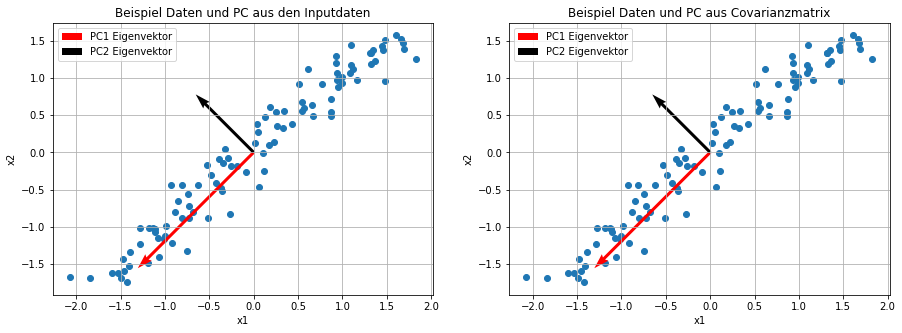

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

# zeichnen der Beispieldaten mit den Eigenvektoren x1 und x2
origin = (0,0)

ax[0].scatter(X_sample_norm[:,0],  X_sample_norm[:,1])
ax[0].quiver(*origin, pca.VT_[0][0], pca.VT_[0][1], width=0.008, scale_units='xy', scale=0.5, color='red', label='PC1 Eigenvektor')
ax[0].quiver(*origin, pca.VT_[1][0], pca.VT_[1][1], width=0.008, scale_units='xy', scale=1, color='black', label='PC2 Eigenvektor')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('Beispiel Daten und PC aus den Inputdaten')
ax[0].grid()
ax[0].legend()

ax[1].scatter(X_sample_norm[:,0],  X_sample_norm[:,1])
ax[1].quiver(*origin, pca_covar.VT_[0][0], pca_covar.VT_[0][1], width=0.008, scale_units='xy', scale=0.5, color='red', label='PC1 Eigenvektor')
ax[1].quiver(*origin, pca_covar.VT_[1][0], pca_covar.VT_[1][1], width=0.008, scale_units='xy', scale=1, color='black', label='PC2 Eigenvektor')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title('Beispiel Daten und PC aus Covarianzmatrix')
ax[1].grid()
ax[1].legend()

plt.show()

Wie in den obigen Grafiken erkennbar ist, sind die Eigenvektoren aus den Inputdaten und die Eigenvektoren der Kovarianzmatrix aus den Inputdaten identisch.

**Zeigen der prozuentalen Erklärung der Varianz** je Prinzipal Component für einmal `svd(Inputdaten)` und `svd(covarianz)`.  
In beiden Fällen erklärt pc1 rund 98% der Variation der Daten und pc2 die restliche Variation von 0.1%.

2 2


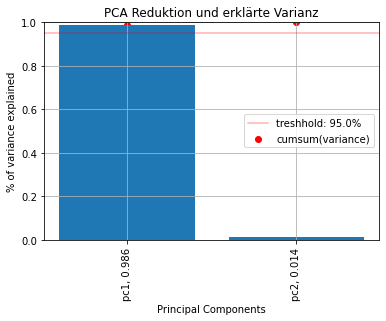

In [9]:
# zeichen Varianze Inputdaten
pca.plot_variance_explained(k_comp=2, limit=0.95, figsize=(6,4))

2 2


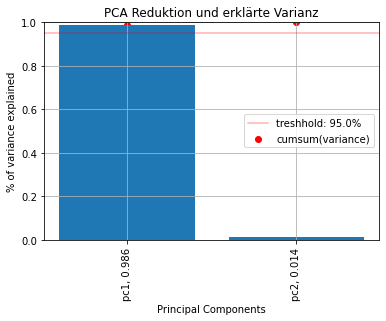

In [10]:
# zeichen Varianze aus der Kovarianzmatrix der Inputdaten
pca_covar.plot_variance_explained(k_comp=2, limit=0.95, figsize=(6,4))

**Zeigen das PCA in Richtung der grössten Varianz entlang PCA berechnet wird**  
Durch die Funktion U, S, V = np.linalg.svd(X) werden die Eigenwerte in S und die Eigenvektoren in V bereits nach den grössten Eigenwerten (oder wichtigste Prinzipal Componenten) sortiert. Wird das Produkt aus den Eigenvektoren mit den X Daten verrechnet wird eine Drehung der Daten entlang der wichtigsten PC erstellt. In unserem Fall entspricht dies x1 aus den Beispieldaten die auf der X-achse mit pc1 abgebildet sind und die höchste Variation der Daten zeigt. Die zweite wichtige PC landet auf der Y-achse in pc2. Bei höheren Dimensionen gilt das gleiche Muster.

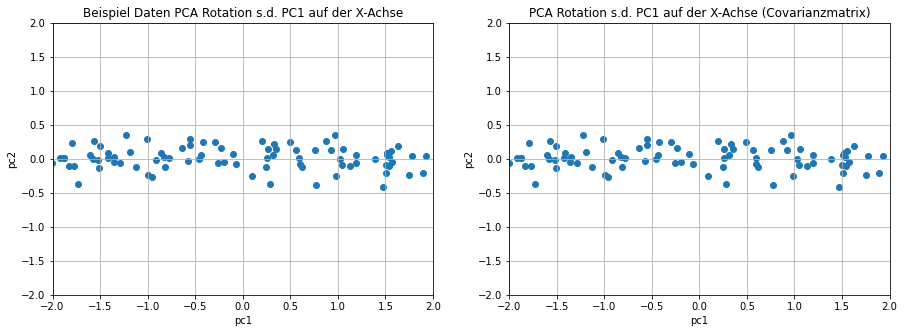

In [11]:
# PCA Analysis
fig, ax = plt.subplots(1,2, figsize=(15,5))

# Drehen der Daten mit den Eigenvektoren
PCA_out = pca.fit_transform(X_sample_norm, 2)
PCA_out_covar = pca.fit_transform_covar(X_sample_norm, 2)

#zeichne der Daten entlang der grössten Principal Komponente
ax[0].scatter(PCA_out[:,0],  PCA_out[:,1])
ax[0].set_ylim(-2, 2)
ax[0].set_xlim(-2, 2)
ax[0].set_xlabel('pc1')
ax[0].set_ylabel('pc2')
ax[0].set_title('Beispiel Daten PCA Rotation s.d. PC1 auf der X-Achse')
ax[0].grid()

#zeichne der Daten entlang der grössten Principal Komponente
ax[1].scatter(PCA_out_covar[:,0],  PCA_out_covar[:,1])
ax[1].set_ylim(-2, 2)
ax[1].set_xlim(-2, 2)
ax[1].set_xlabel('pc1')
ax[1].set_ylabel('pc2')
ax[1].set_title('PCA Rotation s.d. PC1 auf der X-Achse (Covarianzmatrix)')
ax[1].grid()

plt.show()

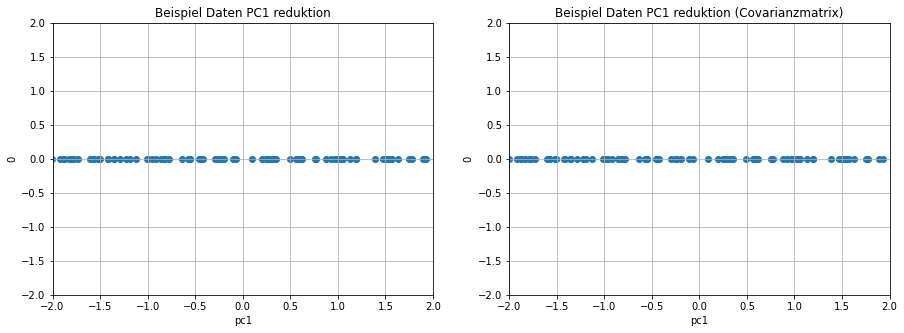

In [12]:
# PCA Analysis
fig, ax = plt.subplots(1,2, figsize=(15,5))

# Drehen der Daten mit den Eigenvektoren
PCA_out = pca.fit_transform(X_sample_norm, 1)
PCA_out_covar = pca.fit_transform_covar(X_sample_norm, 2)

#zeichne der Daten entlang der grössten Principal Komponente
ax[0].scatter(PCA_out[:,0],  np.zeros(len(PCA_out)))
ax[0].set_ylim(-2, 2)
ax[0].set_xlim(-2, 2)
ax[0].set_xlabel('pc1')
ax[0].set_ylabel('0')
ax[0].set_title('Beispiel Daten PC1 reduktion')
ax[0].grid()

#zeichne der Daten entlang der grössten Principal Komponente
ax[1].scatter(PCA_out_covar[:,0],  np.zeros(len(PCA_out_covar)))
ax[1].set_ylim(-2, 2)
ax[1].set_xlim(-2, 2)
ax[1].set_xlabel('pc1')
ax[1].set_ylabel('0')
ax[1].set_title('Beispiel Daten PC1 reduktion (Covarianzmatrix)')
ax[1].grid()

plt.show()

Neben der `.fit()` Methode ist in der Klasse PCA() auch eine `.fit_transform()` Methode für eine direkte Matrix Reduktion verfügbar. Mit `.fit_transform_covar()` wird die Kovarianzmatrix verwendet um die Eigenvektoren zu berechnen. Es können die Anzahl verwendeter Komponenten übergeben werden oder eine Mindestanforderung an die prozentuale Erklärung der Daten gefordert werden. Übliche Werte liegen diese zwischen 0.9 - 0.99.

**Ausgeben der Reduzierten Daten**

In [13]:
# fit transform für reduzierte matrix nach Anzahl Komponenten 
X_reduced = pca.fit_transform(X_sample_norm, 2)
# fit transform für reduzierte matrix nach Anzahl Komponenten 
X_reduced_covar = pca_covar.fit_transform_covar(X_sample_norm, 2)
print()
print(f'% variance explained: {pca.variance_}')
print(f'Eigenwerte: {pca.eigvals_}')
print(f'Eigenvektoren: {pca.VT_}')


% variance explained: [0.98580347 0.01419653]
Eigenwerte: [197.16069344   2.83930656]
Eigenvektoren: [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


Original Daten

In [14]:
# Original Data
X_sample_norm[:5,:]

array([[ 0.32557031,  0.32311215],
       [-1.59762249, -1.62343393],
       [-0.80322459, -0.88450935],
       [-0.92949529, -0.43404902],
       [ 0.93558939,  1.06136481]])

Reduzierte Daten mit svd auf Inputdaten und durch die Eigenvektoren der Covarianzmatrix der Inputdaten. Zeigen das beide gleich)

In [15]:
# Reduced Data
print('Reduzierte Inputdaten')
print(X_reduced[:5,:])
print()

# Reduced Data Covarianzmatrix
print('Reduzierte Inputdaten (PC Covarianzmatrix)')
print(X_reduced_covar[:5,:])

Reduzierte Inputdaten
[[-4.58687769e-01 -1.73817921e-03]
 [ 2.27763084e+00 -1.82514388e-02]
 [ 1.19340811e+00 -5.74770041e-02]
 [ 9.64171430e-01  3.50333416e-01]
 [-1.41205986e+00  8.89366561e-02]]

Reduzierte Inputdaten (PC Covarianzmatrix)
[[-4.58687769e-01 -1.73817921e-03]
 [ 2.27763084e+00 -1.82514388e-02]
 [ 1.19340811e+00 -5.74770041e-02]
 [ 9.64171430e-01  3.50333416e-01]
 [-1.41205986e+00  8.89366561e-02]]


In der Matrix X_reduced ist ersichtlich dass die Werte der wichtigsten PC (pc1) erhalten bleibt, pc1 kann 89% der Daten Variation erklären.

**Testen ob PCA von sklearn zum selben Ergebniss kommt**

In [16]:
import numpy as np
from sklearn.decomposition import PCA as PCA_sklearn

# Berechnung der Varianz und Eigenwerte
pca_sklearn = PCA_sklearn()
pca_sklearn.fit(X_sample_norm)
print(f'% variance explained: {pca_sklearn.explained_variance_ratio_}')
print(f'Eigenwerte: {pca_sklearn.singular_values_**2}')
print(f'Eigenvektoren: {pca_sklearn.components_}')

% variance explained: [0.98580347 0.01419653]
Eigenwerte: [197.16069344   2.83930656]
Eigenvektoren: [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [17]:
pca_sklearn = PCA_sklearn(n_components=2)
pca_sklearn.fit_transform(X_sample_norm)[:5]

array([[-4.58687769e-01,  1.73817921e-03],
       [ 2.27763084e+00,  1.82514388e-02],
       [ 1.19340811e+00,  5.74770041e-02],
       [ 9.64171430e-01, -3.50333416e-01],
       [-1.41205986e+00, -8.89366561e-02]])

**Test PCA eigene Klasse im Vergleich zu PCA Sklearn**  
Die Resultate sind identisch, somit gezeigt und geprüft dass die Berechnungen korrekt sind.

### Aufgabe 3 (6 Punkte)

Zeige (analytisch), dass die Principal Components die Eigenvektoren der Kovarianzmatrix eines Datensatzes sind. Was sind die Eigenwerte?  

Lies das Kapitel von Jolliffe (Jolliffe, Principal Component Analysis, Springer, 2002) im Verzeichnis Literatur in diesem Repo für Inspiration.  

Erkläre was dies bedeutet.

**Zeigen das Principal Components die Eigenvektoren der Kovarianzmatrix des Datensatzes sind** 

*Bemerkung*  
Laut Jolliffe [Principal Component Analysis, Springer, 2002, Seite 6] werden die Principal Components von PCA manchmal als Eigenvektoren ($\alpha_k$) der Kovarianzmatrix genannt. Er schreibt aber, dass die Principal Components besser als die abgeleiteten Variablen $\alpha_k^Tx$ und die Eigenvektoren $\alpha_k'$ als 'loadings' der PC's zu beschreiben wären. Bei der Recherche in der Literatur und im Web werden beide Varianten verwendet, daher sollte man darauf achten und kurz prüfen auf welche Form oder Definition sich die Autoren beziehen. In dieser Challenge werden die Principal Components als die Eigenvektoren gesehen.

**Die Kovarianzmatrix** $C$ von X kann mit folgender Formel berechnet werden:  
$\bar{x}$ ist dabei der mean vector von $x_i$

$$ \Sigma = C =  Cov(X) = \frac{1}{n-1} \left( (X - \bar{x}) (X - \bar{x}) \right) $$

oder mit $B$ als zentrierte Matrix gilt folgendes für die Kovarianzmatrix $C$:

$$ B = X - \bar{X}$$
$$ \Sigma = C = Cov(B) = B^T B$$

Die Eigenvektoren $V$ von $B$ können mit der Singulärwertzerlegung berechnet werden:
$$ B = U\Sigma V^T$$ 

Für die Berechnung der Eigenvektoren der Kovarianzmatrix $B^TB$ gilt sie selbe Formel:

$$ C = B^TB = (U\Sigma V^T)^T (U\Sigma V^T) = V\Sigma^T U^T U \Sigma V^T = V(\Sigma^T \Sigma) V^T$$

Die Eigenwerte befinden sich in $D = (\Sigma^T \Sigma)$ und damit folgt:

$$C = B^TB = VDV^T$$
$$ CV = VD $$

Damit kann gezeigt werden dass die Eigenvektoren $V$ der Kovarianzmatrix gleich der Eigenvektoren $V$ aus der Matrix B sind.

**Theorie und Vorteile von Symmetrischen Matrizen**  
Die Kovarianzmatrix ist eine symmetrische Matrix und diese haben besondere Eigenschaften:
- Alle Eigenwerte einer reelle symmetrischen Matrizen sind reell.
- Die Determinante ist immer grösser gleich 0
- Die Eigenvektoren zu unterschiedlichen Eigenwerten sind immer orthogonal (senkrecht) zueinander (somit auch die PC's orthogonal zueinander).
- Symmetrische Matrizen ($C$) sind diagonalisierbar $C = V D V^T$,

Mit der Singelwertzerlegung können die Eigenvektoren berechnet werden, $ C = U\Sigma V^T$. Die Eigenvektoren (oder Principal Componente) mit den höchsten Singulär werten, zeigen in die Richtung der grössten Variation der Daten. Die Anzahl der benötigten PC ist von Interesse, um beispielsweise 90% der Information von Daten beizubehalten.

Die Dimensionsreduktion berechnet sich anschliessend aus $P_{rincipal} C_{omponentes} A_{Analysis} = X V[:,k:]$, dabei steht $k$ für die Anzahl PC (Eigenvektoren) die man verwenden möchte. Die PC sind als Spalten in $V$ enthalten. Je mehr PC's verwendet werden umso mehr Varaition der Daten wird beibehalten. Ein Beispiel für $k=2$:

$$ PCA = X V[:,k:] =  \left( \begin{matrix} x_{00} & x_{01} \\ x_{10} & x_{11} \\ x_{n0} & x_{n1} \end{matrix} \right) \left( \begin{matrix} v_{00} & v_{01} & v_{01} \\ v_{10} & v_{11} & v_{11} \end{matrix} \right) $$

Dabei werden die k PC's (Eigenvektoren) von $V$, die in Richtung der höchsten Varianze der Daten zeigen, mit den original Daten $X$ verrechnet. Es folgt eine Projektion der Daten in Richtung der Eigenvektoren mit der höchsten Varianz. Somit erreicht PCA eine Dimensionsreduktion in dem sie die original Daten entlang der k wichtigsten Eigenvektoren projiziert. 

**Was sind Eigenwerte?**  
In vielen Anwendungen beschreiben Eigenwerte ($\lambda$) Eigenschaften von mathematischen Modellen. 
- In der Form $CV = \lambda V$ streckt oder staucht der Eigenwert den Eigenvektor und entspricht der gleichen linearen Abbildung wie $C \cdot V$
- Bei symetrischen Matrizen kann die Determinaten aus dem Produkt der Eigenwerte berechnet werden (nützlich um zu prüfen, ob eine Matrix invertierbar ist. ($det=0$ dann nicht singulär, keine eindeutige Lösung und nicht invertierbar.)
- Bei der Singulärwertzerlegung der Kovarianzmatrix $C$ sitzen die Eigenwerte in $\Sigma$. Um die Singulärwerte der Matrix $B$ zu erhalten kann die Wurzel der Eigenwerte von C gezogen werden ($\lambda = \sigma^2$). Je höher ein Eigenwert/Singulärwert umso mehr Varianz der Daten können dadurch erklärt werden, deshalb auch die Wahl der Eigenvektoren anhand der höchsten Eigenwerte. 

### Aufgabe 4 (11 Punkte)

Berechne die Principal Components des Datensatzes der Sonnenspektren.  

Zeichne die kumulative Summe der Varianzen entlang der aufsteigenden Principal Components.  

Wieviele Components brauchen wir, um 95 % der Varianz des Datensatzes zu erhalten?  
Rekonstruiere die Spektren aus diesen $K$ Components und zeichne Original und Rekonstruktion für 100 Beispiele in den gleichen Plot.  

Zeichne die $K$ Principal Components.  

Projiziere die Spektren auf die ersten beiden Principal Components und visualisiere die Spektren im neuen Koordinatensystem.  

Diskutiere sämtliche Plots.

**Verwenden der Daten mit PCA führte zu Systemproblemen**  
Die Eigenvektoren mit svd(df_iris) direkt aus dem Datensatz zu lesen überforderte den Rechner für bereits 50'000 Datenpunkte. Daher ist es zwingend notwendig die Eigenvektoren aus der Kovarianzmatrix zu berechnen. $C = B^TB$. 

In [18]:
# PCA Modell erstellen
pca_iris = PCA().fit_with_covar(df_iris)

**Zeichne kumulative Summe der Varianz**  
Es braucht 6 Principal Components aus den totalen 240 Stück um 95% der Variation in den Daten zu erklären.

240 240


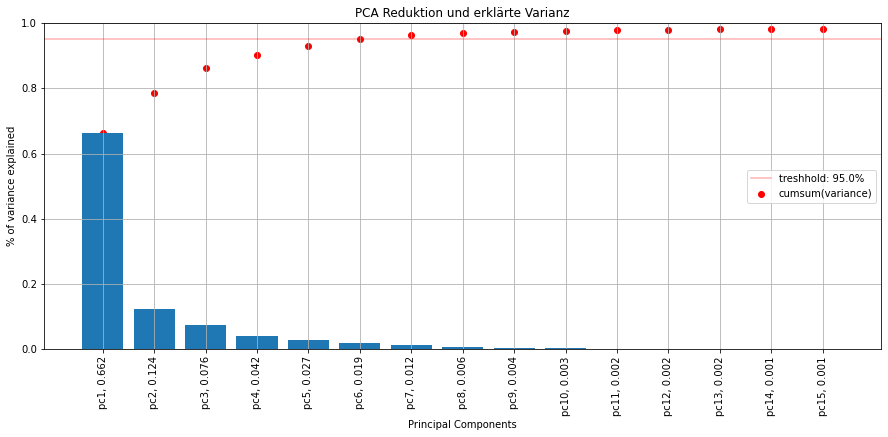

In [19]:
pca_iris.plot_variance_explained(k_comp=15, limit=0.95, figsize=(15,6))

In [20]:
# festlegen der Anzahl Principal Components für Variation >= 95% durch built methode
_ = pca_iris.fit_transform_covar(df_iris, var_proz=0.95)

6 Komponenten notwendig für >= 0.95


**Zeichne Original und Rekonstruktion für 100 Beispiele** im gleichen Plot  
Die Funktion `.rekonstruktion()` aus der PCA() Klasse versucht die originalen Daten zu rekonstruieren. Mit Hilfe der Elemente von SVD, aber unter der Verwendung der Anzahl `n_componentns` die bei der PCA als Haupträger der Variation der Daten gefunden wurden. Aus dem obigen "variance_explained" Plot sehen wird das mit bereits 6 PC's reichen um > 95% der Daten Varaition zu erklären. 

In [21]:
# festlegen der Anzahl Principal Components
k_components = 6
df_iris_pca = pca_iris.fit_transform_covar(df_iris, k_components)
df_iris_pca.shape
#df_iris_pca[0, :]

(791537, 6)

In [22]:
X_rekonstrukt = pca_iris.rekonstruktion(df_iris_pca, k_components)
X_rekonstrukt.shape

U:(240, 240), S:(6, 6), X_PCA(791537, 6)


(791537, 240)

In [23]:
# 100 zufällige Beispiele auswählen
np.random.seed(42)
idx_rnd = np.random.randint(0, df_iris.shape[0], 100)

# 100 Original Daten
df_iris_100 = df_iris[idx_rnd, :].copy()
# 100 Rekonstruierte Daten
X_rekonstrukt_100 = X_rekonstrukt[idx_rnd, :].copy()

print(f'{df_iris_100.shape=}')
print(f'{X_rekonstrukt_100.shape=}')

df_iris_100.shape=(100, 240)
X_rekonstrukt_100.shape=(100, 240)


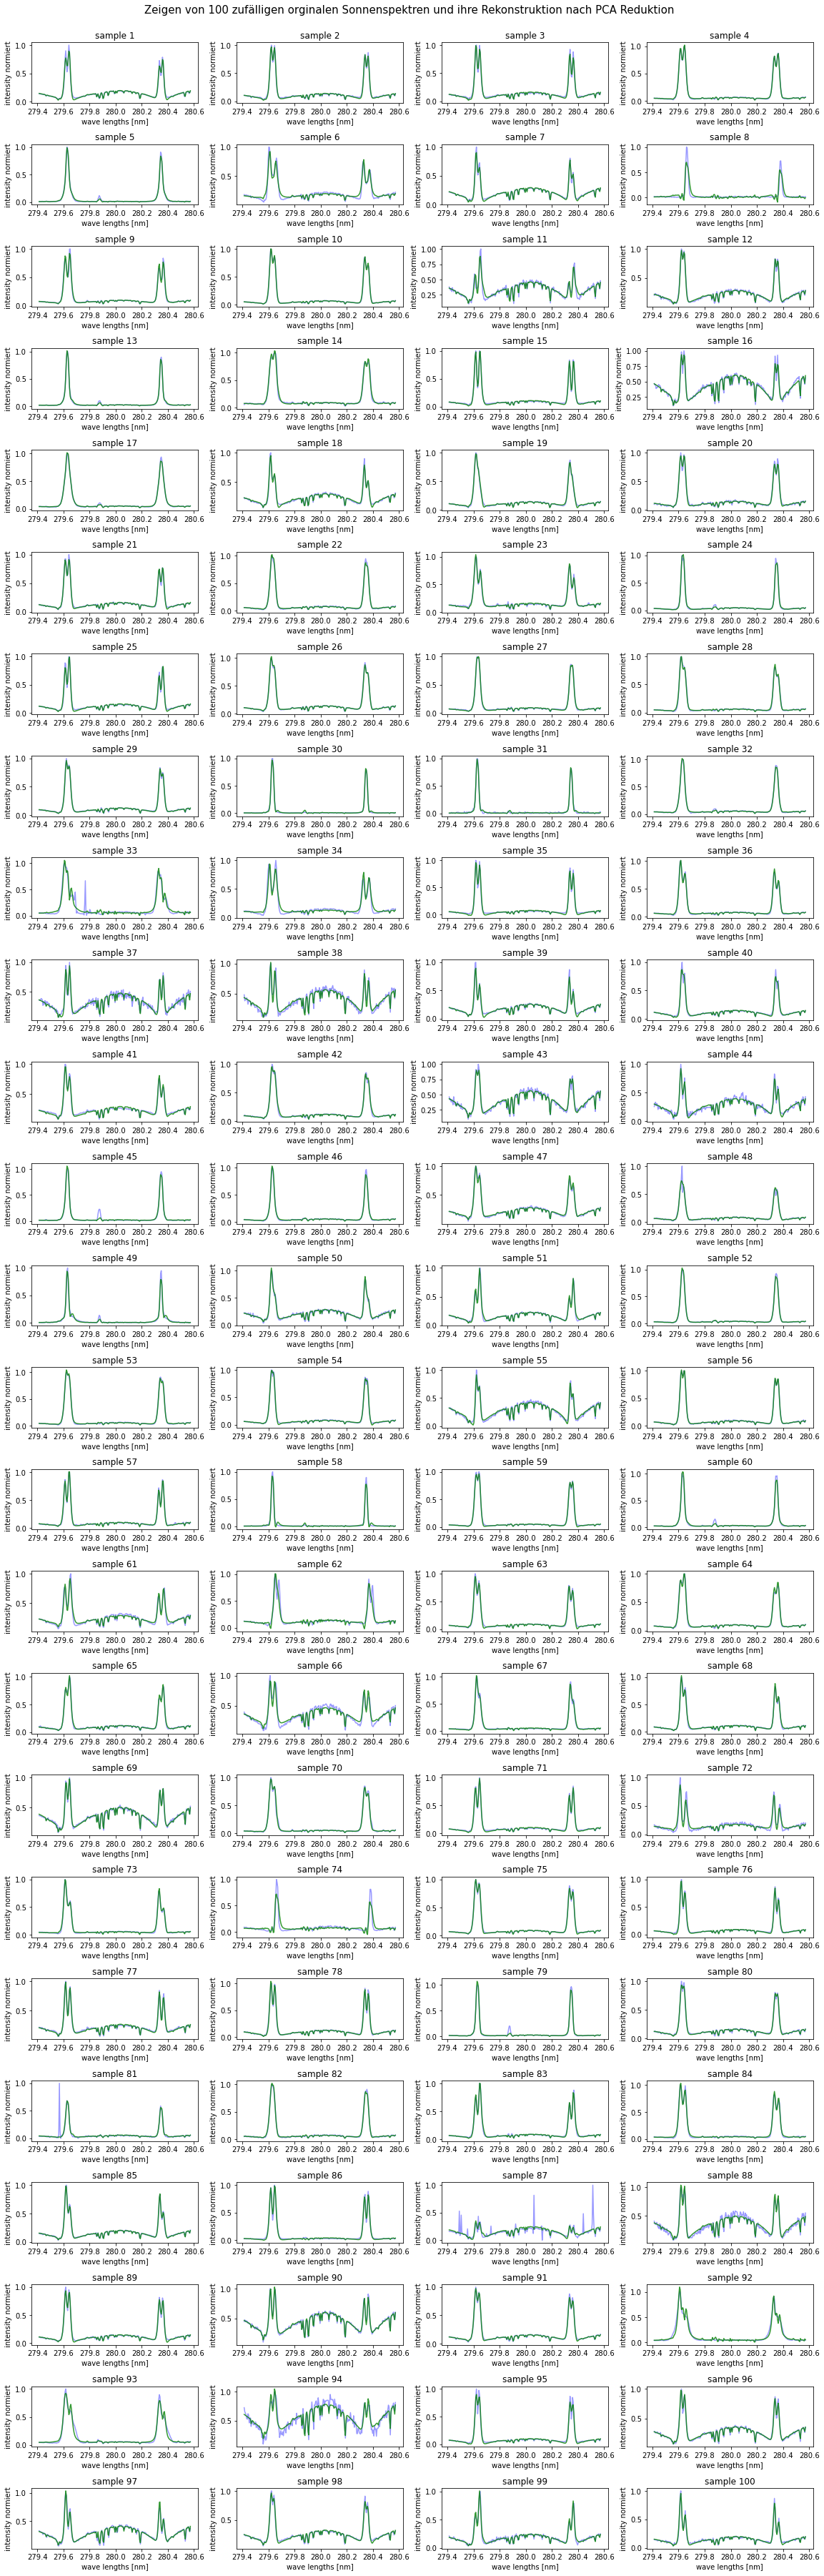

In [24]:
# plote die zufällige 100 Beispiele
fig, ax = plt.subplots(25, 4, figsize=(16,50))
ax = ax.flatten()

# Wellenlänge zwischen 279.414nm und 280.572nm, verwende linspace für 240 Punkte dazwischen
x_label_all = np.linspace(279.414, 280.572, df_iris_100.shape[1])

for i in range(df_iris_100.shape[0]):
    ax[i].plot(x_label_all, df_iris_100[i, :], color='blue', alpha=0.4, label='original')
    ax[i].plot(x_label_all, X_rekonstrukt_100[i, :], color='green', alpha=0.8, label='rekon')
    ax[i].set_title(f'sample {i+1}')
    ax[i].set_xlabel('wave lengths [nm]')
    ax[i].set_ylabel('intensity normiert')    

fig.suptitle('Zeigen von 100 zufälligen orginalen Sonnenspektren und ihre Rekonstruktion nach PCA Reduktion', fontsize=15, y=1)        
plt.tight_layout()
plt.show()

Die obigen 100 Spektren zeigen die originalen Sonnenspektren (blau) und die rekonstruierten Sonnespektren (grün) nach PCA und 6 verwendeten Principal Components.

**Projiziere die Spektren auf die ersten beiden Principal Components**

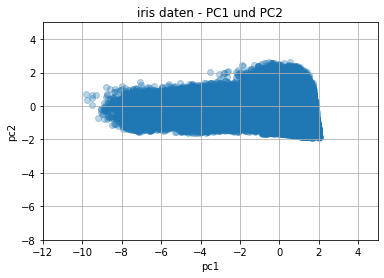

In [51]:
# PCA Analysis
# Drehen der Daten mit den Eigenvektoren
PCA_out_1_2 = pca.fit_transform(df_iris, 2)

#zeichne der Daten entlang der grössten Principal Komponente
plt.scatter(PCA_out_1_2[:,0],  PCA_out_1_2[:,1], alpha=0.3)
plt.xlim(-12, 5)
plt.ylim(-8, 5)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('iris daten - PC1 und PC2')
plt.grid()
plt.show()

Hier ist ersichtlich dass die höchste Varianz der Daten auf der PC1, entlang der X-Achse, liegt. Die zweit wichtigste Varianz (PC 2) liegt auf der Y-Achse.

### Aufgabe 5 (10 Punkte)

Nun wenden wir uns Non-negative Matrix Factorization (NMF) zu.  

Verwende NMF von scikit-learn, um eine Zerlegung der Datenmatrix zu berechnen.  

Entwickle also ein sinnvolles NMF-Modell für den Sonnenspektren Datensatz. Wie kannst du hier die Anzahl Komponenten wählen?

Ein Datenpunkt soll in deinem Ansatz nur durch einen kleinen Teil der Komponenten repräsentiert werden können.
Inwiefern hat dies einen Einfluss auf die Wahl der Regularisierung?  

Welche übergeordneten ML-Entwicklungs- und Model-Selection-Prinzipien kannst du hier einbringen, begründe.

Rekonstruiere die Spektren aus den gefundenen Komponenten und zeichne Original und Rekonstruktion für 100 Beispiele in den gleichen Plot.  

Zeichne die gefundenen Komponenten.  

Wie kannst du visualisieren und aufzeigen, dass die Sonnenspektren tatsächlich nur aus wenigen Komponenten rekonstruiert werden?  


Diskutiere sämtliche Ergebnisse und vergleiche die Resultate mit Aufgabe 3.

**NMF von sklearn** und **entwickle ein NMF-Modell** für den Sonnenspektren Datensatz  
[Doku NMF](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html). Folgend wird mit `NMF().get_params().keys()` welche Parameter für das Modell zur Verfügung stehen. Mit `'n_components'` kann die Anzahl Components bestimmt werden.

In [26]:
# YOUR CODE HERE
from sklearn.decomposition import NMF

NMF().get_params().keys()

dict_keys(['alpha', 'beta_loss', 'init', 'l1_ratio', 'max_iter', 'n_components', 'random_state', 'regularization', 'shuffle', 'solver', 'tol', 'verbose'])

Die Matrizenzerlegung auf dem ganzen Datensatz dauert lang, zum ausprobieren und testen von NMF wird ein sample des orginalen Datensatze verwendet: 

In [27]:
# 20000 zufällige Beispiele auswählen
np.random.seed(42)
idx_rnd = np.random.randint(0, df_iris.shape[0], 20000)

# sample Datensatz
df_iris_sample = df_iris[idx_rnd, :]

In [28]:
# Modell erstellen
n_components = 4
model_nmf = NMF(n_components=n_components, init='random', max_iter=500, random_state=42)
nmf_W = model_nmf.fit_transform(df_iris_sample)
nmf_H = model_nmf.components_

print(f'{nmf_W.shape=}, {nmf_H.shape=}')

nmf_W.shape=(20000, 4), nmf_H.shape=(4, 240)


**Einfluss der Regularisierung**  
Mit `alpha` kann ein Regularisierungs Parameter gesetzt werden, wenn $\alpha = 0$ dann findet keine Regularisierung. In der nächsten Version (1.2) wird dieser Parameter jedoch entfernt und es stehen neu `'alpha_W'` und `'alpha_H'` zur Verfügung. Somit können die Matrizen W und H seperat regularisiert werden. 

Mit `alpha_W` und `alpha_H` werden die Gewichte des Algorithmus gesetzt, somit kann der Einfluss der Koeffizienten oder der Komponenten eingeschränkt, oder eben regularisiert werden. Mit der Option `'same'` werden Parameter gleich regularisiert, es können aber auch unterschiedliche Regularisierungen angewendet werden zum Beispiel L1 auf W und die L2-Norm auf H.

Die L1-Norm führt dazu das gewisse Elemente auch exakt 0 werden können und somit, zum Beispiel falls eines Koeffizienten in der W Matrix 0 werden, haben die entsprechenden Komponenten keinen Einfluss.
Da der Algorithmus iterative jeweils W und H optimiert muss wohl getestet werden, welche Optionen der Möglichkeiten die besten Resultate liefern, evtl. kann mit einer Metrik auf den Rekonstruiertem Datensatz einen Unterschied gemessen werden. 

Folgend soll der single Parameter $\alpha$ für die Regularisierung getestet werden.

Die Funktion `reconstruction_err_` berechnet den Fehler bei der Rekonstruierung der Daten. Also eine Kostenfunktion auf der die Regularisierung getestet werden kann.  

*Bemerkung: Der Parameter `max_iter` wurde bis auf 2500 hochgesetzt, um Warnung zu verhindern. Die Berechnungszeit dauert allerdings einiges länger aber die Grafik die die Regularisierungen zeigen bleiben praktisch identisch. Daher wurde `max_iter=200` belassen und die Warnungen ausgeschaltet*

alpha=0
alpha=10
alpha=20


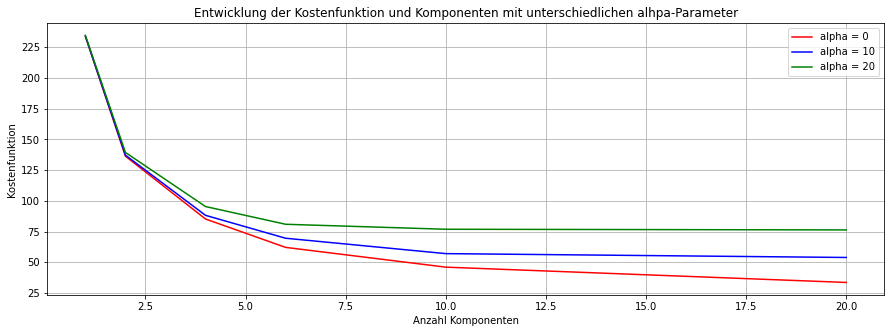

In [29]:
import warnings
warnings.filterwarnings('ignore')

n_components_search = [1, 2, 4, 6, 10, 20]
alphas = [0, 10, 20]

costs_nmf_a0 = []

for n in n_components_search:
    model_nmf_k = NMF(n_components=n, alpha= alphas[0], init='random', max_iter=200, random_state=42)
    nmf_W_k = model_nmf_k.fit_transform(df_iris_sample)
    costs_nmf_a0.append(model_nmf_k.reconstruction_err_) 
print(f'alpha={alphas[0]}')
    
costs_nmf_a1 = []

for n in n_components_search:
    model_nmf_k = NMF(n_components=n, alpha= alphas[1], init='random', max_iter=200, random_state=42)
    nmf_W_k = model_nmf_k.fit_transform(df_iris_sample)
    costs_nmf_a1.append(model_nmf_k.reconstruction_err_)
print(f'alpha={alphas[1]}')
    
costs_nmf_a2 = []

for n in n_components_search:
    model_nmf_k = NMF(n_components=n, alpha= alphas[2], init='random', max_iter=200, random_state=42)
    nmf_W_k = model_nmf_k.fit_transform(df_iris_sample)
    costs_nmf_a2.append(model_nmf_k.reconstruction_err_)
print(f'alpha={alphas[2]}')
    
    
fig = plt.figure(figsize=(15,5))
# Zeichnen des Einflusses der Regularisierung
plt.plot(n_components_search, costs_nmf_a0, c='red', label=f'alpha = {alphas[0]}')
plt.plot(n_components_search, costs_nmf_a1, c='blue', label=f'alpha = {alphas[1]}')
plt.plot(n_components_search, costs_nmf_a2, c='green', label=f'alpha = {alphas[2]}')
plt.title(r'Entwicklung der Kostenfunktion und Komponenten mit unterschiedlichen alhpa-Parameter')
plt.xlabel('Anzahl Komponenten')
plt.ylabel('Kostenfunktion')
plt.legend()
plt.grid()
plt.show()

Die obige Grafik zeigt den Einfluss der Regularisierung. Bei 'rot' findet keine Regularisierung statt und die Kosten werden mit zunehmenden Komponenten immer kleiner. Bei den Linien 'blau' und 'grün' beeinflusst die Regularisierung NMF ab der vierten Komponente und ab der Zehnten Komponente bleiben die Kosten konstant und es findet keine Verbesserung mehr statt. Overfitting verhindert. 

**Welche übergeordneten ML-Entwicklungs- und Model-Selection-Prinzipien kannst du hier einbringen**  
- Da die Berechnungen auf dem ganzen Datenset der Sonnenspektren sehr lang dauern, kann zur Ansicht und Testen unterschiedlicher Parameter auch ein kleineres, sample Datenset verwendet werden. Falls gute Parameter gefunden wurden, können diese auf dem ganzen Datenset angewendet werden.
- Mit der Kostenfunktion als Interpretationsmetrik, können die besten Parameter gesucht werden. Evtl. lässt sich auch GridSearchCV oder RandomizedSearchCV von sklearn einsetzen. Je nach Anwendung muss man nun einschätzen wie stark die Reduzierung erfolgen sollte und viel der ursprünglichen Information beibehalten werden soll.
- Falls Interpretierbarkeit, nach der Reduktion wichtig ist, kann zum Beispiel NMF anstelle von PCA verwendet werden.

**Rekonstruiere die Spektren aus den gefundenen Komponenten** und zeichne Original und Rekonstruktion für 100 Beispiele in den gleichen Plot.  
Die Rekonstruktion aus dem NMFf-Modell erhält man durch das Produkt von W @ H ~ df_iris.

In [30]:
# Rekonstruktion
nmf_rekonstrukt = nmf_W @ nmf_H
print(f'{nmf_rekonstrukt.shape=}')
nmf_rekonstrukt[:1,:10]

nmf_rekonstrukt.shape=(20000, 240)


array([[0.1478408 , 0.14529686, 0.14364941, 0.14127115, 0.13900355,
        0.13711351, 0.13466414, 0.13200244, 0.13009167, 0.12857639]])

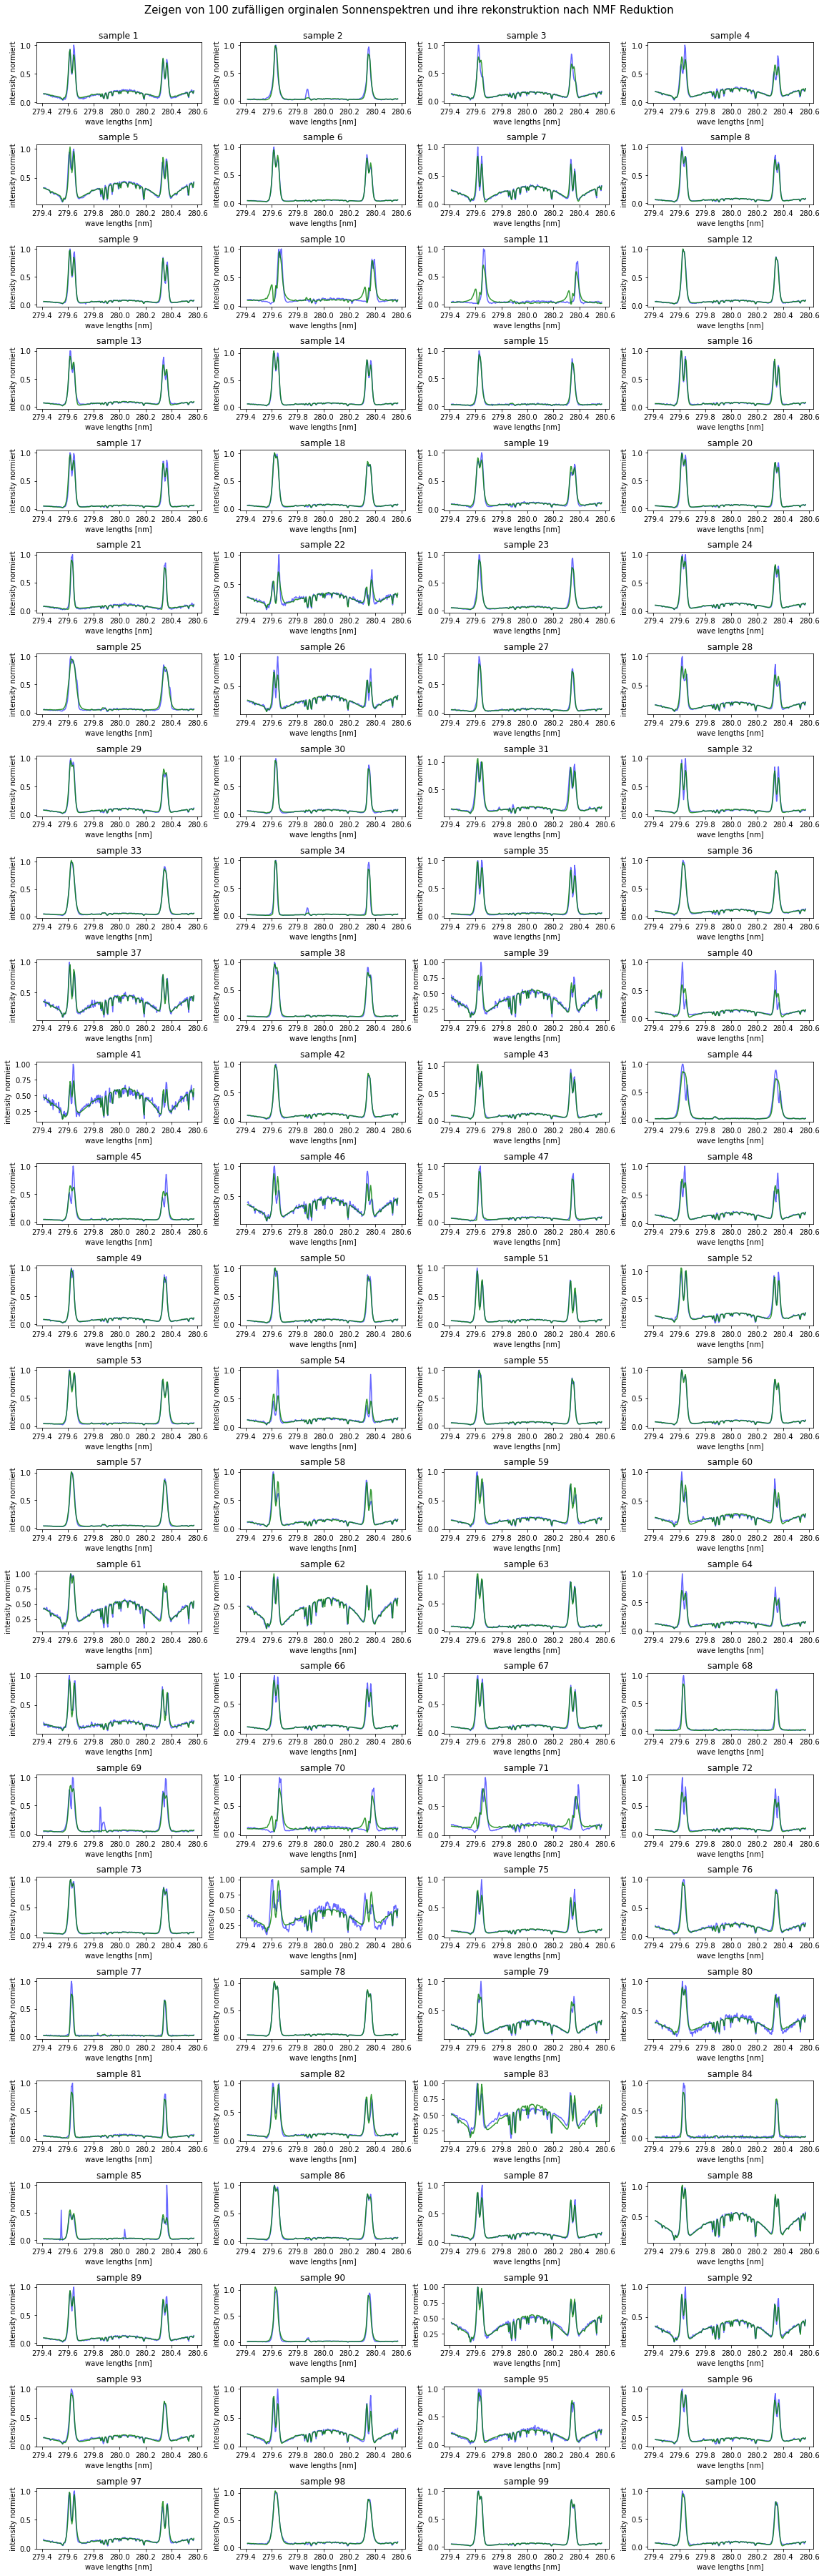

In [31]:
# Nimm 100 zufällige Beipiele aus dem Datenset
np.random.seed(42)
idx_rnd = np.random.randint(0, df_iris_sample.shape[0], 100)

df_iris_sample_100 = df_iris_sample[idx_rnd, :].copy()
nmf_rekonstrukt_100 = nmf_rekonstrukt[idx_rnd, :].copy()

# plote die zufällige 100 Beispiele
fig, ax = plt.subplots(25, 4, figsize=(16,50))
ax = ax.flatten()

# Wellenlänge zwischen 279.414nm und 280.572nm, verwende linspace für 240 Punkte dazwischen
x_label_all = np.linspace(279.414, 280.572, df_iris_sample_100.shape[1])

for i in range(df_iris_sample_100.shape[0]):
    ax[i].plot(x_label_all, df_iris_sample_100[i, :], color='blue', alpha=0.6, label='original')
    ax[i].plot(x_label_all, nmf_rekonstrukt_100[i, :], color='green', alpha=0.8, label='rekon')
    ax[i].set_title(f'sample {i+1}')
    ax[i].set_xlabel('wave lengths [nm]')
    ax[i].set_ylabel('intensity normiert')    

fig.suptitle('Zeigen von 100 zufälligen orginalen Sonnenspektren und ihre rekonstruktion nach NMF Reduktion', fontsize=15, y=1)       
plt.tight_layout()
plt.show()

Die obigen 100 Spektren zeigen die originalen Sonnenspektren (blau) und die rekonstruierten Sonnespektren (grün) nach NMF und 6 verwendeten Components.

**Zeichne die gefundenen Komponenten**  
zeichnen von Component 1 auf der X-Achse und Component 2 auf der Y-Achse. Auch bei der NMF Reduktion kann gesehen werden, dass die Variation der ersten Komponente höher ist als die der zweiten Komponente.

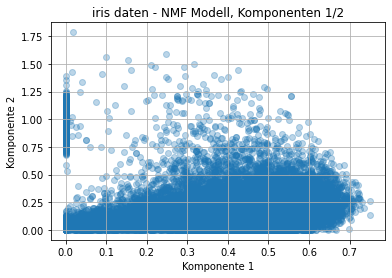

In [32]:
# PCA Analysis
# Drehen der Daten mit den Eigenvektoren
#zeichne der Daten entlang der grössten Principal Komponente
plt.scatter(nmf_W[:,0],  nmf_W[:,1], alpha=0.3)
#plt.ylim(-5, 5)
plt.xlabel('Komponente 1')
plt.ylabel('Komponente 2')
plt.title('iris daten - NMF Modell, Komponenten 1/2')
plt.grid()
plt.show()

**Wie kannst du visualisieren und aufzeigen, dass die Sonnenspektren tatsächlich nur aus wenigen Komponenten rekonstruiert werden?**  

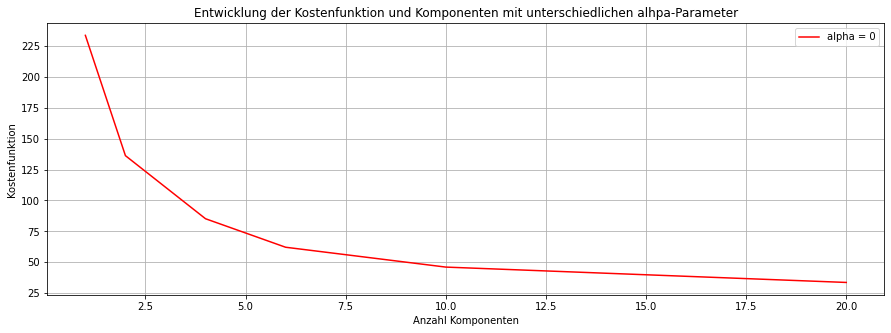

In [33]:
fig = plt.figure(figsize=(15,5))
# Zeichnen des Einflusses der Regularisierung
plt.plot(n_components_search, costs_nmf_a0, c='red', label=f'alpha = {alphas[0]}')
plt.title(r'Entwicklung der Kostenfunktion und Komponenten mit unterschiedlichen alhpa-Parameter')
plt.xlabel('Anzahl Komponenten')
plt.ylabel('Kostenfunktion')
plt.legend()
plt.grid()
plt.show()

Die Kostenfunktion von NMF berechnet die L2-Distanz der Datenpunkte zwischen Original und Reduktion. In der Kostenfunktionsgrafik ist ersichtlich, dass die Kosten mit mehr Komponenten gegen 0 laufen werden (bis alle Komponenten des originalen Datensatzes verwendet wurden). Man kann aber auch herauslesen, dass bei $k<6$ die Kosten am stärksten sinken. Die Distanz oder der Fehler wird ab $k>6$ zwar weiter verkleinert, jedoch nicht mehr gleich stark. Somit kann gezeigt werden dass nur einen Teil der Komponenten verwendet werden kann und denoch der grösste Teil der Daten erhalten werden kann. 

### Aufgabe 6 - K-Means (8 Punkte)

K-Means ist ein Clustering-Algorithmus. Mit K-Means können wir einen Datensatz in $K$ Gruppen (Cluster) unterteilen. Eine Funktion $C(i) \in \{ 1, \dots, K \}$ ordnet dabei jedem Datenpunkt $i$ einen Cluster $k$ zu. 

Die $K$ Gruppen werden dabei über $K$ Zentroiden, Clustermittelpunkte $\mu_k$, charakterisiert. Datenpunkte (Pixelwerte in unserem Fall) werden dem Zentroiden zugeordnet, der ihnen am nächsten ist. Der K-Means-Algorithmus (siehe unten) findet dabei ein lokales Minimum für die Funktion

$$
J(C) = \sum_{k=1}^{K} \sum_{C(i)=k} ||x^{(i)} - \mu_k||^2
$$

Er minimiert also den summierten quadrierten Abstand der Datenpunkte zu ihrem Zentroiden.  

Da der Algorithmus nur ein lokales Minimum findet, initialisiert man den Algorithmus in der Regel mehrfach und behält am Schluss die Lösung mit dem kleinsten Wert für die Kostenfunktion.

Ein Durchlauf / eine Initialisierung des Algorithmus funktioniert wie folgt:

---

#### K-Means Algorithmus

*Initialisierung*: Wähle $K$ Zentroiden zufällig aus den gegebenen Datenpunkten.

*Schritt 1*: Für gegebene Zentroiden $(\mu_1, .., \mu_k)$ ordne man sämtliche Datenpunkte jeweils jenem Cluster zu, dessen Zentroid dem jeweiligen Datenpunkt am nächsten ist. Also


\begin{eqnarray}
C(i) = \mathsf{argmin}_k ||x^{(i)} - \mu_k||^2
\end{eqnarray}


*Schritt 2*: Für eine gegebene Cluster-Zuordnung $C$ minimiere man die 'Gesamt-Cluster-Varianz' durch Aktualisieren der Zentroiden mit:


\begin{eqnarray}
\mu_k = \frac{1}{N_k} \sum_{C(i)=k}x^{(i)}
\end{eqnarray}

$N_k$ sind die Anzahl Datenpunkte, die k zugeordnet sind.  

*Schritt 3*: Man wiederhole die Schritte 1 und 2 bis sich die Zentroiden nicht mehr verändern oder der Wert der Funktion $J(C)$ sich kaum mehr verbessert.

---

Vervollständige die folgende Klasse, welche den K-Means-Algorithmus umsetzen soll.  

Zeige anhand eines konstruierten Beispiels, dass dein Algorithmus zuverlässig funktioniert.  
Verwende zur Konstruktion des Beispiels `sklearn.datasets.make_blobs`.

In [34]:
# If you want, you can use the following function to efficiently compute pairwise distances.
# Read the docstring to learn how to use it.
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
import matplotlib

class KMeans(object):
    
    def __init__(self, k=3, n_inits=10, random_seed=None, print_info=False):
        '''KMeans clustering algorithm.
        
        Parameters
        ----------
        k: number of clusters
        n_intis: number of initializations
        '''
        # Parameters
        self.k = k
        self.n_inits = n_inits
        self.random_seed = random_seed
        self.max_iter = 10
        self.print_info = print_info
        
        # The following attributes will be computed through execution of the
        # KMeans algorithm in the fit method.
        self.centroids_ = np.array([])
        self.centroids_way_ = np.array([])
        self.labels_ = np.array([])
        self.cost_ = 999
        self.cost_all_ = np.array([])
        self.num_iterations_ = None
        self.random_init_ = None
    
    def check_random_init():
        pass
    
    def fit(self, X):
        '''Clusters the dataset X into k clusters.
        '''  
        X = np.array(X)
        
        # Anzahl Ausführungen von KMeans
        for n in range(self.n_inits):
            
            # setze k random init mit random Datenpunkte k < X.shape[0]
            np.random.seed(self.random_seed)
            init_fail = False
            idx_rnd = np.random.randint(0, X.shape[0], self.k)
            random_data_sample = X[idx_rnd]  
            self.centroids_ = X[idx_rnd] 
            
            # Mittelwerte der Zentroide solange neu setzen bis sich diese nicht mehr verändern
            iteration = 0
            while True:  
                #print('iteration: ', self.num_iterations_)
                #print('max iteration: ', self.max_iter)
                
                #print('X shape: ', X.shape)                
                #print('zent shape: ', self.centroids_.shape)
                # Berechne alle Distanzen der Datenpunkte zu cluster punkten mit cdist
                dist_datapoints = cdist(X, self.centroids_, 'euclidean')
                # minimale Distnaz index suchen und Cluster point zu ordnen (array -> label)
                min_dist_points_idx = np.argmin(dist_datapoints, axis=1)
                self.label_ = min_dist_points_idx               
                #print('label len. ', self.label_.shape)
                
                # Berechnen der neuen Mittelwerte der cluster (Zentroiden)
                X_y = np.concatenate((X, self.label_.reshape(-1,1)), axis=1)
                Zentroids = np.array([])
                Zentroids_way = []
                for i in range(self.k):
                    # Punkte die zu einem Cluster / Zentroid gehören
                    zentroid_points = X_y[X_y[:, -1] == i][:,:-1]
                    if zentroid_points.shape[0] == 0:
                        init_fail = True
                        #print('init_fail')
                        break
                        
                    # Neuer Mittelwert berechnen
                    #print('zen_points', zentroid_points)
                    zentroid_mean = np.mean(zentroid_points, axis=0)
                    Zentroids = np.append(Zentroids, zentroid_mean)
                    Zentroids_way.append(Zentroids.reshape(-1, X.shape[1]))
                Zentroids = Zentroids.reshape(-1, X.shape[1])    
                #print('new zent mean: ', Zentroids.shape)
                
                if init_fail == False:
                    # prüfen ob Mittelwert der Zentroiden unterschiedlich, wenn gleich dann Abbrechen
                    if not np.allclose(self.centroids_, Zentroids):
                        self.centroids_ = Zentroids
                    else:
                        if self.print_info: print(f'found mean cluster after {self.num_iterations_} Iterations')
                        break 
                    # es kann passieren wen ranodm state nicht definiert ist, das ein random init gefunden
                    # wird der nicht nicht konvergiert (Mittelpunkt Zentroid Berechnung)
                    if iteration >= self.max_iter:
                        self.centroids_ = Zentroids
                        if self.print_info: print(f'{self.max_iter} max Iterations reached')
                        break
                else:
                    break
                
                iteration += 1
                
            # Vergleiche die n Anzahl KMeans und wähle die tiefste Kosten Funktion
            J = self.cost_function(X)
            if self.print_info: print('J: ', J)
            self.cost_all_ = np.append(self.cost_all_, J)
            
            if J < self.cost_:
                self.cost_ = J
                best_centroids = self.centroids_
                self.random_init_ = random_data_sample
                self.centroids_way_ = Zentroids_way
                self.num_iterations_ = iteration
                
        # setzen der besten Zentroiden
        self.centroids_ = best_centroids                  
        return self
  
    def cost_function(self, X):
        '''Computes the KMeans cost function for a given dataset X.
        '''
        # YOUR CODE HERE
        # Berechnen der neuen Mittelwerte der cluster (Zentroiden)
        X_y = np.concatenate((X, self.label_.reshape(-1,1)), axis=1)
        sum_zentroids_all = np.array([])
        for i in range(self.k):
            # Punkte die zu einem Cluster / Zentroid gehören
            zentroid_points = X_y[X_y[:, -1] == i][:,:-1]
            
            # Wenn Random init gleiche samples aus einem Cluster nimmt dann steckt man fest
            # hier abbrechen und Kosten hoch setzen
            if zentroid_points.shape[0] == 0:
                return 1
            
            # summe von den Daten berechnen die im selben Cluster (c) sind || x(i) - mu(c)(i) berechnen
            sum_zent_single_cluster = np.sum(np.square(np.linalg.norm(zentroid_points - self.centroids_[i])))
            sum_zentroids_all = np.append(sum_zentroids_all, sum_zent_single_cluster)
        
        J = (1/X.shape[0]) * np.sum(sum_zentroids_all)
        return J
        
        
    
    def predict(self, X):
        '''Assigns each data point in X to the closest cluster.
        
        Can only be used after the clustering algorithm has been executed.
        '''
        # Berechne alle Distanzen der Datenpunkte zu cluster punkten mit cdist
        dist_datapoints = cdist(X, self.centroids_, 'euclidean')
        # minimale Distnaz index suchen und Cluster point zu ordnen
        min_dist_points_idx = np.argmin(dist_datapoints, axis=1)
        y_predict = min_dist_points_idx 
        
        return y_predict
  
    # further methods go here
    # YOUR CODE HERE
    def plot_costs(self):
        # Ausgeben der minimalen Kosten gefunden
        min_cost = self.cost_
        min_cost_idx = np.argmin(self.cost_all_)

        plt.plot(np.arange(len(self.cost_all_)), self.cost_all_)
        plt.scatter(min_cost_idx, min_cost, c='red', label=f'min cost: {np.round(min_cost, 4)}')
        plt.xlabel('n KMean Iterations')
        plt.ylabel(r'Kostenfunktion $J$')
        plt.title('Kostenfunktion mit random init je Iteration')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_random_init(self, X, xlabel='X', ylabel='Y'):
        random_init = self.random_init_
        
        plt.scatter(X[:,0], X[:,1])
        plt.scatter(random_init[:, 0], random_init[:, 1], c='red', label='random sample init')
        plt.scatter(self.centroids_[:, 0], self.centroids_[:, 1], c='purple', marker='x', label='Zentroid Mittelpunkt')
        #for i in range(self.num_iterations_):
        #    cent_way_step_i = self.centroids_way_[i]
        #    plt.scatter(cent_way_step_i[i, 0], cent_way_step_i[i, 1], c='grey', label='Zentroid Weg')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title('Auswahl der zufälligen Datenpunkten (lucky or unlucky)')
        plt.legend()
        plt.grid()
        plt.show()
        
    def plot_predict(self, X, y_predict, xlabel='X', ylabel='Y'):
        colors = ['#ac1917', '#b75420', '#c0982b', '#768b45', '#237f5d', '#1c7873', '#156b8a', '#3f5d82']
        cmap = cmap=matplotlib.colors.ListedColormap(colors)
        X_y_kmean = np.concatenate((X, y_predict.reshape(-1,1)), axis=1)
        plt.scatter(X_y_kmean[:,0], X_y_kmean[:,1], c=X_y_kmean[:,2], cmap=cmap)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title('Datenpunkte und Cluster zuordnung KMeans')
        #plt.legend()
        plt.grid()
        plt.show()

**Beispiel Daten erzeugen** mit sklearn.datasets.make_blobs

In [35]:
from sklearn.datasets import make_blobs
import matplotlib

X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)
X_y_org = np.concatenate((X, y.reshape(-1,1)), axis=1)
X[:2,:]

array([[-7.72642091, -8.39495682],
       [ 5.45339605,  0.74230537]])

In [36]:
np.mean(X[:2,:], axis=0)

array([-1.13651243, -3.82632573])

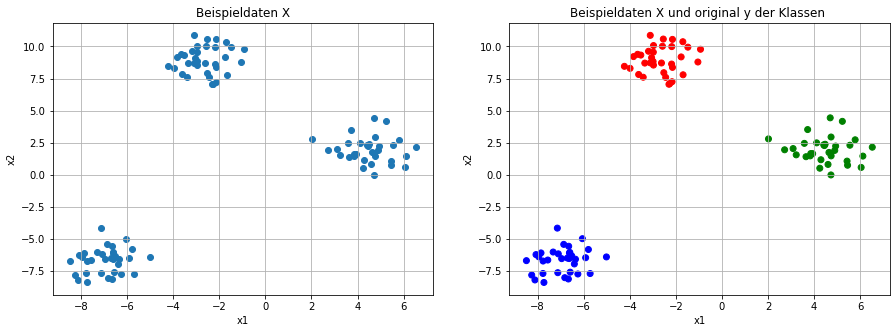

In [37]:
# zeigen der orginalen Cluster zuordnung
cmap = cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue'])
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].scatter(X[:,0], X[:,1])
ax[0].set_title('Beispieldaten X')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].grid()

ax[1].scatter(X_y_org[:,0], X_y_org[:,1], c=X_y_org[:,2], cmap=cmap)
ax[1].set_title('Beispieldaten X und original y der Klassen ')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].grid()
plt.show()

**Testen der KMeans() Klasse**  
Die Initialisierung der zufälligen Datenpunkte spielen eine wichtige Rolle, da es je nach Startwert zu anderen Ergebnissen kommen kann. Die Empfehlung ist, die KMeans Clustering öfters auszuführen, um einige Kombinationen zu testen. Mit der Kostenfunktion wird dann die beste Aufteilung der Daten bewertet und die Werte entsprechend den minimalen Kosten verwendet. Auch ist die Wahl von $k$ wichtig, in den Beispiel daten sind deutlich drei Cluster zu erkennen. Soll ein Modell mit vier Cluster erstellt werden, geht das ohne Probleme, nur wird dann ein Cluster in zwei Untercluster aufgeteilt.  

Folgend sollen ein paar Beispiele die unterschiedlichen Situationen verdeutlichen (dabei werden random_seed Werte gesetzt, womit Kmeans nur mit einer Samplewahl zurechtkommen muss):
1. Beispiel: zufällige Datenpunkte wurden jeweils aus einem Cluster gezogen (erreicht mit `random_seed=13`). 
1. Beispiel: zwei der zufällige Datenpunkte kommen aus demselben Cluster (erreicht mit `random_seed=1`).
1. Beispiel: Die Daten zeigen drei Cluster, KMeans soll aber vier Cluster aufteilen (erreicht mit `random_seed=13`).
1. Beispiel: KMeans mit mehreren durchläufen, bis die tiefste Kostenfunktion gefunden wurde (`random_seed=None`)  

*Bemerkung: wird ein `random_seed` gesetzt werden alle samples gleichgezogen, daher ist der Wert der Kostenfunktion auch immer gleich*

1. Beispiel:  
Random Sample finden sich in jedem Cluster und die Mittelwerte der Zentroiden können schnell konvergieren.

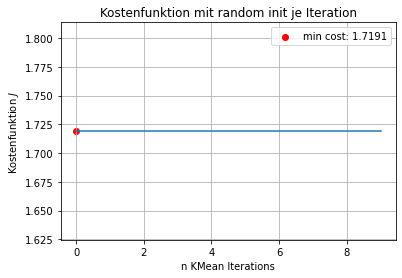

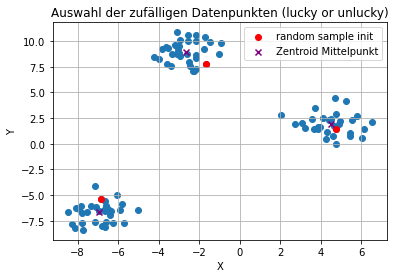

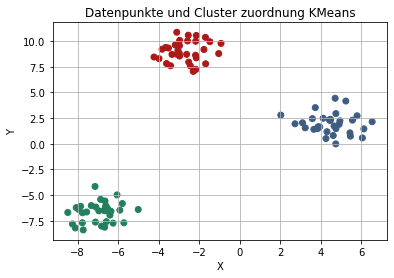

In [38]:
# Modell erstellen
kmeans_model = KMeans(k=3, n_inits=10, random_seed=13, print_info=False)
kmeans_model.fit(X)

# Plot Kosten mit random iterationen
kmeans_model.plot_costs()

# Plot ranodm sample getroffen
kmeans_model.plot_random_init(X)

# Prediction KMean
y_pred = kmeans_model.predict(X)

# Plot Prediction
kmeans_model.plot_predict(X, y_pred)

2. Beispiel:  
Fallen zwei der random Datenpunkte in einem Cluster, fällt die Aufteilung bereits nicht mehr gleich aus. Der KMeans Algorithmus verschiebt die Mittelpunkte, bis die Kostenfunktion minimal ist. Dieses Beispiel zeigt warum KMeans öfter ausgeführt werden sollte. Mehrer Versuchen erhöhen die Chancen für eine 'beste' Cluster Aufteilung der Daten. 

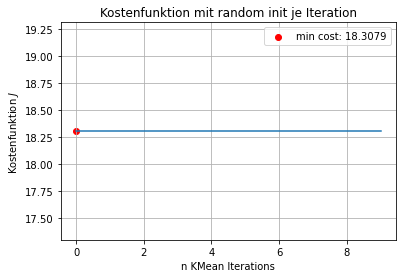

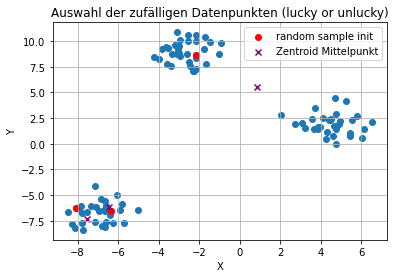

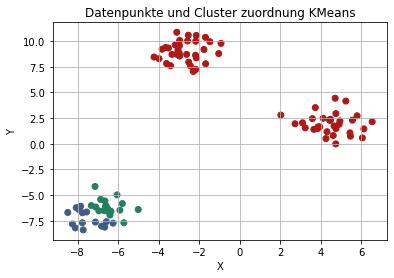

In [39]:
# Modell erstellen
kmeans_model = KMeans(k=3, n_inits=10, random_seed=1, print_info=False)
kmeans_model.fit(X)

# Plot Kosten mit random iterationen
kmeans_model.plot_costs()

# Plot ranodm sample getroffen
kmeans_model.plot_random_init(X)

# Prediction KMean
y_pred = kmeans_model.predict(X)

# Plot Prediction
kmeans_model.plot_predict(X, y_pred)

3. Beispiel:  
Die Aufteilung in mehr Cluster geschieht ohne Probleme, je mehr Cluster verwendet werden umso genauer kann die Kostenfunktion werden. Wie genau $k$ gewählt werden muss folgt in einer späteren Erklärung. Hier soll gezeigt werden, dass die Wahl von $k$ entscheidend ist. Die Beispieldaten haben drei Cluster, durch die Wahl von $k=4$ wurde einer der Cluster weiter aufgeteilt.

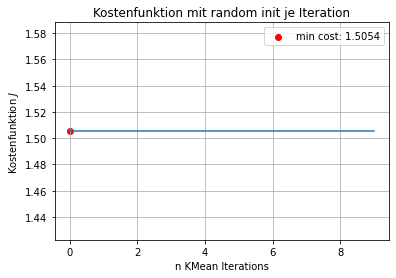

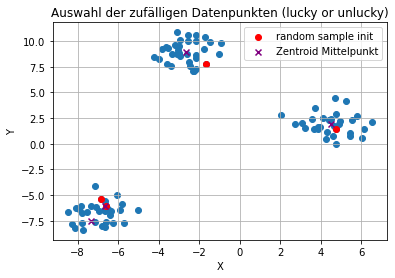

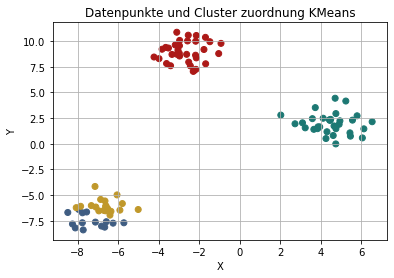

In [40]:
# Modell erstellen
kmeans_model = KMeans(k=4, n_inits=10, random_seed=13, print_info=False)
kmeans_model.fit(X)

# Plot Kosten mit random iterationen
kmeans_model.plot_costs()

# Plot ranodm sample getroffen
kmeans_model.plot_random_init(X)

# Prediction KMean
y_pred = kmeans_model.predict(X)

# Plot Prediction
kmeans_model.plot_predict(X, y_pred)

4. Beispiel:  
Hier wird KMeans öfter initialisiert und die gefundenen Werte zum minimalen Kostenfunktionwert verwendet. In diesem Beispiel sehen wir, auch wenn die Wahl der Initial Datenpunkte im selben Cluster starten, können die Zentroide so verschoben werden, dass die Kostenfunktion minimal wird und die Mittelpunkte der Cluster gefunden werden.  
Es gibt Situationen in denen Random Datenpunkte keine gute Initialisierung treffen, diese werden von KMeans verworfen (zum Beispiel, wenn ein Cluster nicht zugeordnet wird - Slicing nach Klassen dann nicht möglich).  

*Bemerkung: folgender Code kann mehrmals ausgeführt werden, man sieht die unterschiedlich gewählten random Datenpunkte. Diese führen aber jeweils zur selben Clusterbildung*

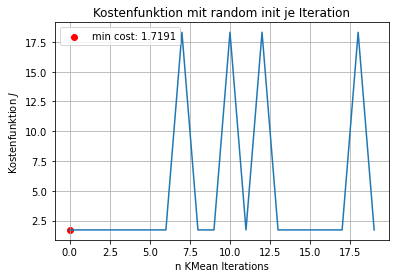

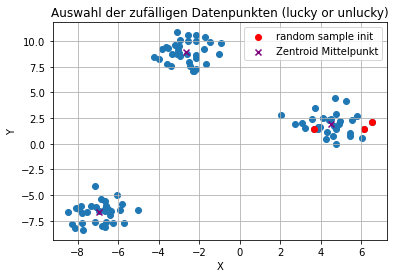

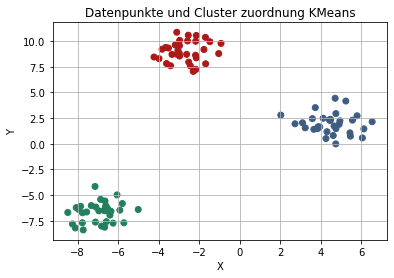

In [58]:
# Modell erstellen
kmeans_model = KMeans(k=3, n_inits=20, random_seed=None, print_info=False)
kmeans_model.fit(X)

# Plot Kosten mit random iterationen
kmeans_model.plot_costs()

# Plot ranodm sample getroffen
kmeans_model.plot_random_init(X)

# Prediction KMean
y_pred = kmeans_model.predict(X)

# Plot Prediction
kmeans_model.plot_predict(X, y_pred)

**Testen der Distanz Berechnung von cdist()** mit der numpy Norm Funktion  
$ dist_{xo} = ||x_0 - \mu||^2$, $x_o$ = Datenpunkt, $\mu$ = Cluster Punkte

`cdist()` gibt die Distanzen auf den Zeilen aus, mit `np.argmin(axis=1)` den Index mit kürzeste Distanz suchen und Cluster zuordnen.

In [42]:
from scipy.spatial.distance import cdist

# random init der Cluster durch 3 Datenpunkte
np.random.seed(42)
idx_rnd = np.random.randint(0, X.shape[0], 3)
cluster_points = X[idx_rnd, :]
#print(cluster_points)

# Berechnen der Euklidischen Distanz mit numpy Norm
x0_d1, x0_d2, x0_d3 = np.linalg.norm(X[0,:] - cluster_points[0]), np.linalg.norm(X[0,:] - cluster_points[1]), np.linalg.norm(X[0,:] - cluster_points[2])
print('Prüfen Norm Berechnung np.linalg.norm():')
print([x0_d1, x0_d2, x0_d3])
print()

# Berechnen der eukldischen Distanz
cdist_norm = cdist(X, cluster_points, 'euclidean')
print('Prüfen Norm Berechnung cdist():')
print(cdist_norm[:4, :])
print()
print(f'x0 kleinste Distanz an index: cluster_points[{np.argmin(cdist_norm[0, :])}]')

# min dist index als Array
print()
argmin_idx = np.argmin(cdist_norm, axis=1)
print(f'index min Distanz Datenpunkte: {argmin_idx[:4]}')

Prüfen Norm Berechnung np.linalg.norm():
[15.991888092103048, 16.567174262367338, 18.562007782272296]

Prüfen Norm Berechnung cdist():
[[15.99188809 16.56717426 18.56200778]
 [ 1.28299839 11.21351991 11.1120725 ]
 [10.91995895  2.00345154  1.26368695]
 [ 1.82099337 11.78642626 11.62996415]]

x0 kleinste Distanz an index: cluster_points[0]

index min Distanz Datenpunkte: [0 0 2 0]


### Aufgabe 7 - K-Means auf Sonnenspektren (7 Punkte)

Beschreibe nun in Worten was es bedeutet, diese Spektren zu clustern.

Nimm ein Clustering mit deiner Implementierung von KMeans der Sonnenspektren vor.  

Bestimme einen sinnvollen Wert für $K$. Erläutere dabei dein Vorgehen und diskutiere auch alternative Möglichkeiten dafür.  

Zeichne die Zentroiden.  

Beschreibe und diskutiere deine Resultate.  
Lege dabei Unterschiede von Zentroiden und Principal Components, sowie NMF Komponenten aus der ersten ule Mini-Challenge dar.  

Könnte man K-Means auch als Matrizen-Zerlegung betrachten? Wie?

**Beschreibung Cluster der Sonnenspektren**  
KMeans findet Strukturen oder unterschiedliche Eigenschaften in den Messdaten und 'gruppiert' dann gleiche oder ähnliche Messdaten in Clustern.  

Um die Laufzeiten Überschaubar zu halten werden auch hier die Sampledaten anstelle des kompletten Datensatzes verwendet.

In [43]:
X_iris = df_iris_sample.copy()
X_iris.shape

(20000, 240)

**Cluster auf den Sonnenspektren**  
*Achtung dieser Prozessschritt dauert einen Moment*

0.9078428872541652


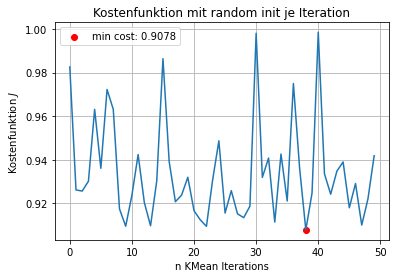

In [44]:
# Modell erstellen
kmeans_iris_model = KMeans(k=8, n_inits=50, random_seed=None, print_info=False)
kmeans_iris_model.fit(X_iris)

# Plot Kosten mit random iterationen
print(kmeans_iris_model.cost_)
kmeans_iris_model.plot_costs()

# Prediction KMean
y_pred = kmeans_iris_model.predict(X_iris)

**Bestimme einen sinnvollen Wert für $K$**  
Um einen sinnvollen Wert für K zu suchen, sollen mehrere K für ein KMean Modell ausprobiert werden, die Kosten zu den unterschiedlichen $K$ Werten soll geplottet werden.

k-Werte werden getestet: [ 4  6  8 10 12 14 16 18]
k-Wert: 4
k-Wert: 6
k-Wert: 8
k-Wert: 10
k-Wert: 12
k-Wert: 14
k-Wert: 16
k-Wert: 18


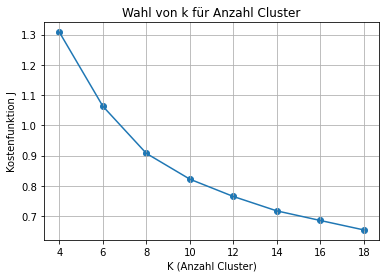

In [45]:
# K Werte festlegen
k_test = np.arange(4, 20, 2)
print(f'k-Werte werden getestet: {k_test}')
cost_all = []

for k in k_test:
    print(f'k-Wert: {k}')
    # Modell erstellen
    kmeans_iris_model_k = KMeans(k=k, n_inits=20, random_seed=None, print_info=False)
    kmeans_iris_model_k.fit(X_iris)
    # minimale Kosten des Modells mit k speichern
    cost_all.append(kmeans_iris_model_k.cost_)
    
# Kosten zeichnen
plt.plot(k_test, cost_all)
plt.scatter(k_test, cost_all)
plt.xticks(k_test)
plt.xlabel('K (Anzahl Cluster)')
plt.ylabel('Kostenfunktion J')
plt.title('Wahl von k für Anzahl Cluster')
plt.grid()
plt.show()

Die Wahl von $K$, also die Anzahl Cluster, die gebildet werden sollen, wird noch oft von Hand festgelegt. Die Wahl ist jedoch nicht immer einfach, im unsupervised learning bestehen keine Lables, daher gibt es mehrere korrekte Möglichkeiten um die Daten in Cluster aufzuteilen. Folgend zwei Möglichkeiten, um $k$ zu bestimmen: 
1. Zeichnen der Kostenfunktion zu verschiedenen $k$-Werten. Da die Kosten immer kleiner werden für höhere $k$-Werte, kann mit der 'Elbow Methode' versucht werden, optimale $k$-Werte zu finden.  Die grösste Reduktion der Kosten findet man dann bei einem gewissen $k=elbow$, danach fallen die Kosten nicht mehr gleich stark. Diese Methode wird in der Praxis jedoch nicht oft verwendet da ein klarer Elbow Effekt nicht oft ersichtlich ist. Im obigen Plot fallen die Kosten nach $k=8$ weniger stark, aber ein Elbow Effekt ist nicht eindeutig zu sehen.
1. Eine weitere Möglichkeit ist zu hinterfragen für welchen Zweck ein Clustering durchgeführt wird. Diese Fragestellung kann helfen eine gute Wahl für $k$ zu treffen. In Fall der Sonnenspektren könnten zum Beispiel die unterschiedlichen Intensitäten zwischen den zwei Picks in Klassen unterteilt werden. Zum Beispiel: Klasse a) keine Intensität zwischen den Picks, Klasse b) erhöhte Intensität, Klasse c) hohe Intensität zwischen den zwei Picks Klasse d) unterschiedliche Formen von den zwei Hauptpicks, etc.

Nach Andrew Ng kann die Kostenfunktion gezeichnet und auf den 'Elbow' geprüft werden, falls dieser vorhanden ist kann $k=elbow$ gesetzt werden. Ansonsten wird üblicherweise die Frage nach dem Zweck der Cluster verwendet.

[Quelle Andrew NG](https://www.youtube.com/watch?v=lbR5br5yvrY&ab_channel=ArtificialIntelligence-AllinOne)

**Zeichnen der Zentroide**  
Die Zentroiden beschreiben den Mittelpunkt einer Klasse. Somit können die Zentroiden direkt als Durchschnittsmesswert je Klasse gesehen und auch geplottet werden.

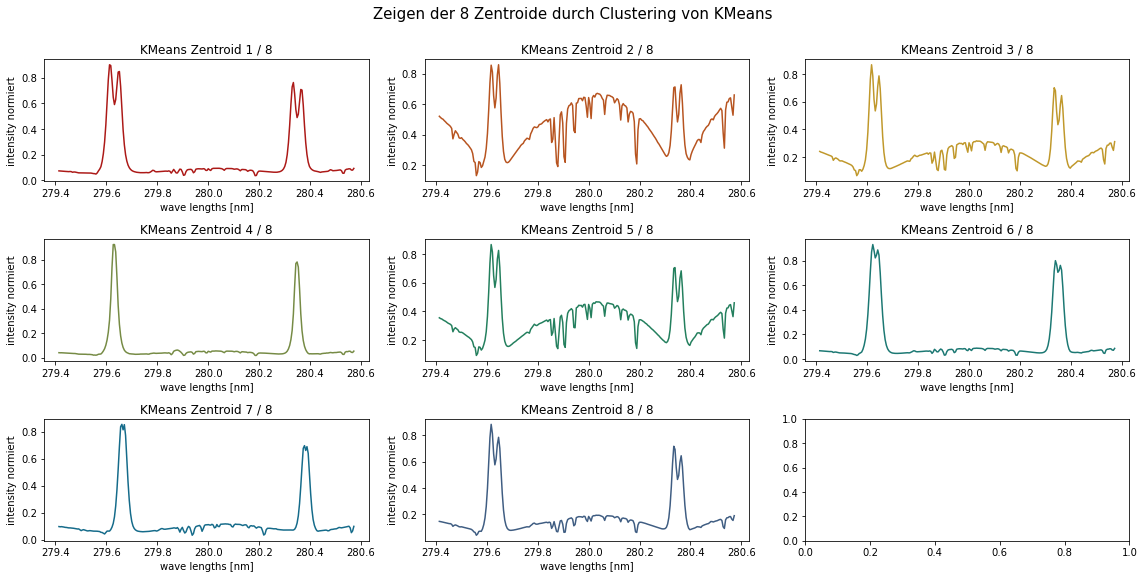

In [46]:
# plote die zufällige 100 Beispiele
fig, ax = plt.subplots(3, 3, figsize=(16,8))
ax = ax.flatten()

colors_zent = ['#ac1917', '#b75420', '#c0982b', '#768b45', '#237f5d', '#1c7873', '#156b8a', '#3f5d82']

# Wellenlänge zwischen 279.414nm und 280.572nm, verwende linspace für 240 Punkte dazwischen
x_label_all = np.linspace(279.414, 280.572, df_iris_100.shape[1])

for i, col in zip(range(kmeans_iris_model.centroids_.shape[0]), colors_zent):
    ax[i].plot(x_label_all, kmeans_iris_model.centroids_[i, :], color=col)
    ax[i].set_title(f'KMeans Zentroid {i+1} / {kmeans_iris_model.centroids_.shape[0]}')
    ax[i].set_xlabel('wave lengths [nm]')
    ax[i].set_ylabel('intensity normiert')    

    fig.suptitle('Zeigen der 8 Zentroide durch Clustering von KMeans', fontsize=15, y=1) 
plt.tight_layout()
plt.show()

**Beschreiben der Resultate**  
In obigen Plot sind die Mittelwerte der unterschiedlichen Cluster abgebildet. KMmeans findet Strukturen und teilt diese in Klassen ein. Man kann sehen, dass die zwei Picks (~279,6 nm, ~280.35nm) immer vorhanden sind, jedoch variieren die Intensitäten zwischen den zwei Picks. Man sieht tiefe, mittlere und starke Intensitäten dazwischen. Auch gibt es Cluster bei denen die Spitzen der Picks in zwei Spitzen unterteilt sind. 

Das Clustering von KMeans findet also unterschiedliche Eigenschaften von Messungen und teilt diese in unterschiedliche Klassen ein. Prüfbar sind die Resultate, indem die Zentroiden gezeichnet werden. PCA projiziert die Messdaten auf die entsprechenden Principal Components (Eigenvektoren mit den höchsten Eigenwerten) und reduziert somit die Daten. Das Ziel ist mit wenigen PC möglichst viel der Variation der Daten erklären zu können. Bei NMF findet auch eine Reduktion der Datenmatrix statt (in Koeffizienten und Komponenten). Die Cluster von KMean könnten den Komponenten von NMF sehr ähnlich sein. Beide zeigen eine Art Grundstruktur der Daten. Durch die Koeffizienten in NMF werden die Komponenten so verändert, dass die Messdaten abgebildet werden können. Für PCA könnte dasselbe für die wichtigsten Eigenvektoren gelten.

**KMeans als Matrizen Zerlegung betrachten?**  
Auch wenn KMean die Datenmenge nicht direkt reduziert, führt das Clustering zu einer Aufteilung der Daten und legt somit die Grundstruktur der Daten durch die Zentroide frei. Somit kann auch bei KMeans von einer Matrizen Zerlegung gesprochen werden.  

### Aufgabe 8 (5 Punkte)

Visualisiere die Cluster im Raum der ersten beiden Principal Components zusammen mit ihren Zentroiden.  

Beschreibe und diskutiere deine Resultate. Entsprechen sie deinen Erwartungen?

In [47]:
# PCA Modell erstellen
pca_iris_model = PCA()
pca_iris = pca_iris_model.fit_transform_covar(df_iris, 2)
pca_iris.shape

(791537, 2)

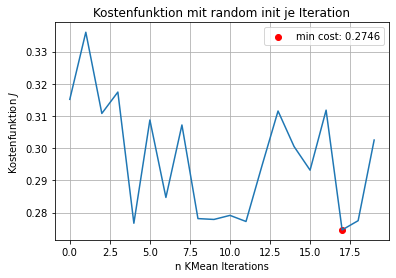

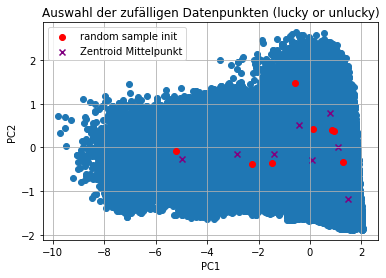

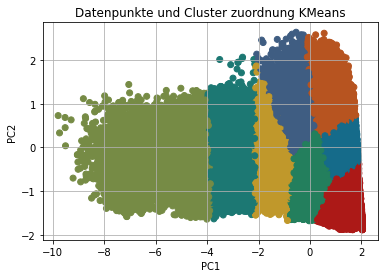

<Figure size 432x288 with 0 Axes>

In [48]:
# KMean Modell erstellen
kmeans_iris_model2 = KMeans(k=8, n_inits=20, random_seed=None, print_info=False)
kmeans_iris_model2.fit(pca_iris)

# Plot Kosten mit random iterationen
kmeans_iris_model2.plot_costs()

# Plot ranodm sample getroffen
kmeans_iris_model2.plot_random_init(pca_iris, xlabel='PC1', ylabel='PC2')

# Prediction KMean
y_pred = kmeans_iris_model2.predict(pca_iris)

# Plot Prediction
kmeans_iris_model2.plot_predict(pca_iris, y_pred, xlabel='PC1', ylabel='PC2')

plt.tight_layout()

Der KMeans Algorithmus kann beliebig oft ausgeführt werden und landen jeweils bei der gleichen Cluster Aufteilung. Somit kann gezeigt werden das ein Clustering der Datenpunkten in den reduzierten Daten gefunden wird. Durch die PCA können die reduzierten Daten jedoch nicht mehr in Wellenlängen erklärt werden, was eine Interpretation aus meiner Sicht schwierig macht. Modell können jedoch von den reduzierten Daten profitieren und trotzdem Muster erkennen, wie hier ersichtlich.

**Folgend sollen die Zentroide von KMeans auf dem reduzierten Datensatz untersucht werden**  
Um die Cluster von Kmeans besser zu verstehen können die Zentroide rekonstruiert und grafisch dargestellt werden. 

In [49]:
# Zentroide Rekonstruieren
X_rekonstrukt_centroid = pca_iris_model.rekonstruktion(kmeans_iris_model2.centroids_, 2)
print(f'Rekonstrukions shape: {X_rekonstrukt_centroid.shape}')

U:(240, 240), S:(2, 2), X_PCA(8, 2)
Rekonstrukions shape: (8, 240)


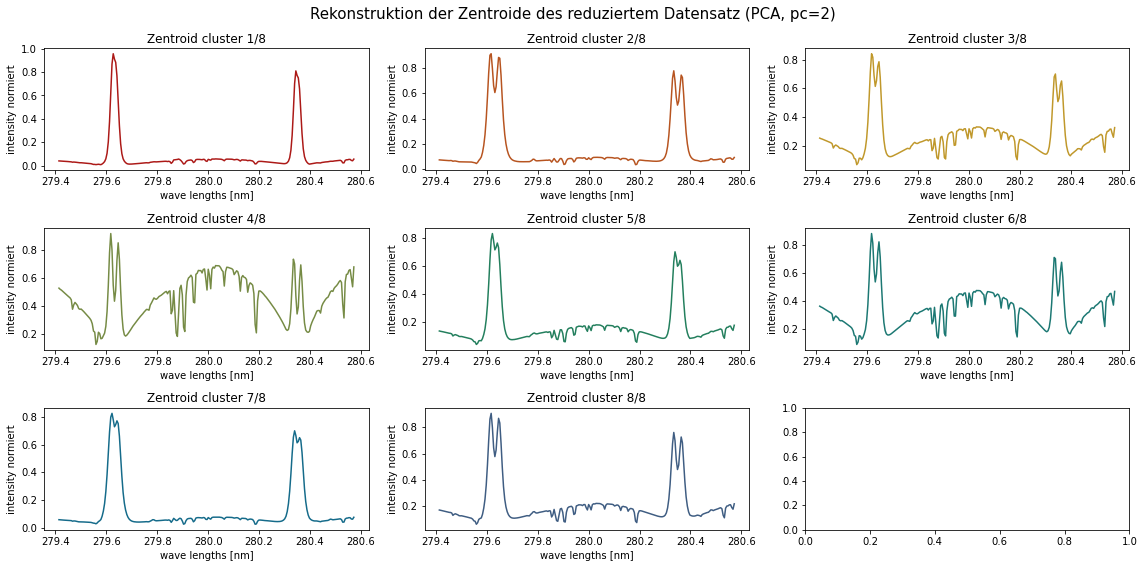

In [50]:
# zeichnen der rekonstruierten Zentruiden
colors_cluster = ['#ac1917', '#b75420', '#c0982b', '#768b45', '#237f5d', '#1c7873', '#156b8a', '#3f5d82']

# plote die 8 Beispiele
fig, ax = plt.subplots(3, 3, figsize=(16,8))
ax = ax.flatten()

# Wellenlänge zwischen 279.414nm und 280.572nm, verwende linspace für 240 Punkte dazwischen
x_label_all = np.linspace(279.414, 280.572, X_rekonstrukt.shape[1])

for i in range(X_rekonstrukt_centroid.shape[0]):
    ax[i].plot(x_label_all, X_rekonstrukt_centroid[i, :], color=colors_cluster[i])
    ax[i].set_title(f'Zentroid cluster {i+1}/{8}')
    ax[i].set_xlabel('wave lengths [nm]')
    ax[i].set_ylabel('intensity normiert')

fig.suptitle('Rekonstruktion der Zentroide des reduziertem Datensatz (PCA, pc=2)', fontsize=15)       
plt.tight_layout()
plt.show()

Mit PCA wurde der ursprüngliche Datensatz reduziert und zwei Principal Components beibehalten, damit können ca. 80% der Datenvariation erklärt werden. Die Anwendung von KMeans ($k=8$) auf dem reduziertem Datensatz und die Rekonstruktion dieser, gibt uns die obige Grafik mit den Zentroide (Mittelwerte) der Cluster.  
Die Anordnung der Cluster ist unterschiedlich zu der in Aufgabe 7, aber es kann verglichen werden, dass dieselben Cluster Einteilungen entstehen wie auf dem originalen Datenset in Aufgabe 7. Somit konnte mit PCA die Dimensionen der Daten von 240 Dimensionen auf gerade mal 2 Dimensionen herunter gebrochen werden und das Clustering von Kmeans kommt dennoch zum selben Resultat. Das zeigt das PCA ein mächtiges Instrument ist, um Daten zu reduzieren und ohne grosse Informationsverluste.

### Aufgabe 9 (4 Punkte)

Beschreibe abschliessend die drei hier verwendeten *Unsupervised Learning*-Methoden miteinander. Was zeichnet sie aus, was unterscheidet sie?

**Unsupervise Learning-Methoden verwendet:**
1. PCA  
1. NMF
1. KMeans

**PCA und NMF**  
PCA und NMF reduzieren beide die Dimensionen der Daten. Mit der Anzahl verwendeten Prinicpal Components von PCA wird probiert die Dimension der Daten zu verkleinern und gleichzeitig möglichst viel der Datenvariation zu erhalten. NMF findet die wichtigen nicht-negativen Features. Für grosse Datensätze bringt dies hinsichtlich Berechnungsleistung erhebliche Vorteile, um zum Beispiel Modelle zu trainieren. PCA erstellt mit den Eigenvektoren eine reduzierte Matrix, die eindeutig ist. Bei NMF hingegen werden die Matrizen W und H random initialisiert und gegenseitig optimiert, weshalb die reduzierte Matrix jeweils unterschiedlich Ergebnisse enthalten kann (die Initialisierung wird benötigt um mit Gradient Descent das Minimum von W und H zu suchen). Für die bessere Reproduzierbarkeit könnte die Initialisierung jedoch angepasst oder dokumentiert werden.

Bei NMF sind nur nicht negative Werte erlaubt, was zu nicht negative Matrizen führt, dies ist zum Beispiel bei Daten mit Bildern oder Texten der Fall. Auch beschreibt Element of statistical Learning (Seite 554), das im Vergleich zu PCA, sich NMF Strukturen oder Metadaten merken kann. Anhand von Bildern zeigt sich dies im Buchbeispiel, als lernen der Merkmale von Gesichtern (Nasen, Augen, Mund, etc). Die Komponenten bei Texten können als Topics gesehen werden (Topic-modeling).  
Dieselben Daten mit PCA zu zerlegen kann zu nicht interpretierbare Werten in den reduzierten Matrix führen (negative Wort länge). Somit ist die Interpretierbarkeit von Matrizenzerlgung mit NMF besser als die Zerlegung mit PCA. PCA hat dafür keine Probleme mit negativen Werten in den Daten. Hinsichtlich des trainieren von Modellen liefern aber offenbar beide ähnliche Resultate.

**NMF / PCA, KMeans**  
PCA und NMF sprechen beide das Thema 'curse of dimensionality' an. Falls zu viele Dimensionen vorhanden sind, kann KMeans schlechte Resultate liefern und die Dimension der Daten sollte vorab reduziert werden. Eine Reduktion der Dimensionen kann dann mit PCA oder NMF erfolgen und ggf. bessere Resultate für KMeans Cluster liefern.

Kmeans findet durch Cluster (oder Klassen), ebenfalls wie NMF, Strukturgrundlagen in den Daten und kann diese zuordnen. Die Zentroiden von KMeans können also auch als W Matrix von NMF gesehen werden.

**Ende gml - mini Challenge 3**  
Student: Manuel Schwarz